<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/Wind_Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages("dplyr")
library(dplyr)
#install.packages('corrplot')
#install.packages('mlbench')
#install.packages('caret')
library(mlbench)
library(caret)
library(corrplot)
library(ggplot2)
#install.packages('GGally')
#install.packages('BAS')
#install.packages('MASS')
library(GGally)
library(BAS)
library(MASS)
#install.packages('tseries')
#install.packages('plm')
library(tseries)
library(plm)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: ignored

In [ ]:
wind=read.csv('winds.csv')
print(head(wind,5))

  Bear.Creek Frey.Farm Criterion.Wind.Park NedPower Humboldt LocustRidge
1       8.73      4.40                9.80    10.33    10.14        7.73
2       7.37      5.16                9.84    10.51     7.73        9.13
3       7.38      4.80                9.15     8.74     6.90        5.73
4       6.76      5.89                9.48     8.67     8.33        2.96
5       4.55      2.42               10.20     8.81     6.47        2.31
  Roth.Rock Talbot Mountaineer BuffaloMountain BitWorks MtPeakUtility Anacacho
1      8.30   7.07        9.60           13.25     9.56         16.72     1.44
2      9.11   6.65        9.26           12.68    13.65         17.27     3.89
3      8.59   5.94        8.05           13.44    11.56         16.06     5.49
4      8.26   4.64        8.03           13.97    11.92         16.13    17.63
5      9.60   3.55        6.96           15.06    11.27         13.58    16.59
  DryLake Kingman
1    4.64   10.89
2    2.12   10.36
3    1.15   10.57
4    0.91   11.6

In [ ]:
summary(wind)

   Bear.Creek       Frey.Farm      Criterion.Wind.Park    NedPower     
 Min.   : 0.210   Min.   : 0.040   Min.   : 0.150      Min.   : 0.150  
 1st Qu.: 5.027   1st Qu.: 3.190   1st Qu.: 4.848      1st Qu.: 4.760  
 Median : 7.270   Median : 5.350   Median : 7.605      Median : 7.150  
 Mean   : 7.665   Mean   : 5.731   Mean   : 8.230      Mean   : 7.664  
 3rd Qu.: 9.860   3rd Qu.: 7.950   3rd Qu.:10.980      3rd Qu.:10.092  
 Max.   :28.510   Max.   :22.170   Max.   :26.020      Max.   :23.280  
    Humboldt       LocustRidge       Roth.Rock          Talbot      
 Min.   : 0.120   Min.   : 0.050   Min.   : 0.100   Min.   : 0.100  
 1st Qu.: 5.040   1st Qu.: 3.030   1st Qu.: 4.188   1st Qu.: 4.190  
 Median : 7.355   Median : 4.850   Median : 6.585   Median : 6.400  
 Mean   : 7.656   Mean   : 5.407   Mean   : 7.046   Mean   : 6.634  
 3rd Qu.: 9.890   3rd Qu.: 7.150   3rd Qu.: 9.412   3rd Qu.: 8.810  
 Max.   :26.660   Max.   :26.230   Max.   :22.300   Max.   :23.950  
  Mountaineer

In [ ]:
#correlation matrix
M=cor(wind)
print(head(round(M,2)))

                    Bear.Creek Frey.Farm Criterion.Wind.Park NedPower Humboldt
Bear.Creek                1.00      0.72                0.47     0.51     0.88
Frey.Farm                 0.72      1.00                0.54     0.57     0.77
Criterion.Wind.Park       0.47      0.54                1.00     0.89     0.58
NedPower                  0.51      0.57                0.89     1.00     0.61
Humboldt                  0.88      0.77                0.58     0.61     1.00
LocustRidge               0.75      0.68                0.35     0.41     0.72
                    LocustRidge Roth.Rock Talbot Mountaineer BuffaloMountain
Bear.Creek                 0.75      0.45   0.63        0.55            0.30
Frey.Farm                  0.68      0.52   0.68        0.59            0.31
Criterion.Wind.Park        0.35      0.91   0.49        0.66            0.55
NedPower                   0.41      0.92   0.53        0.76            0.44
Humboldt                   0.72      0.56   0.64        0.61  

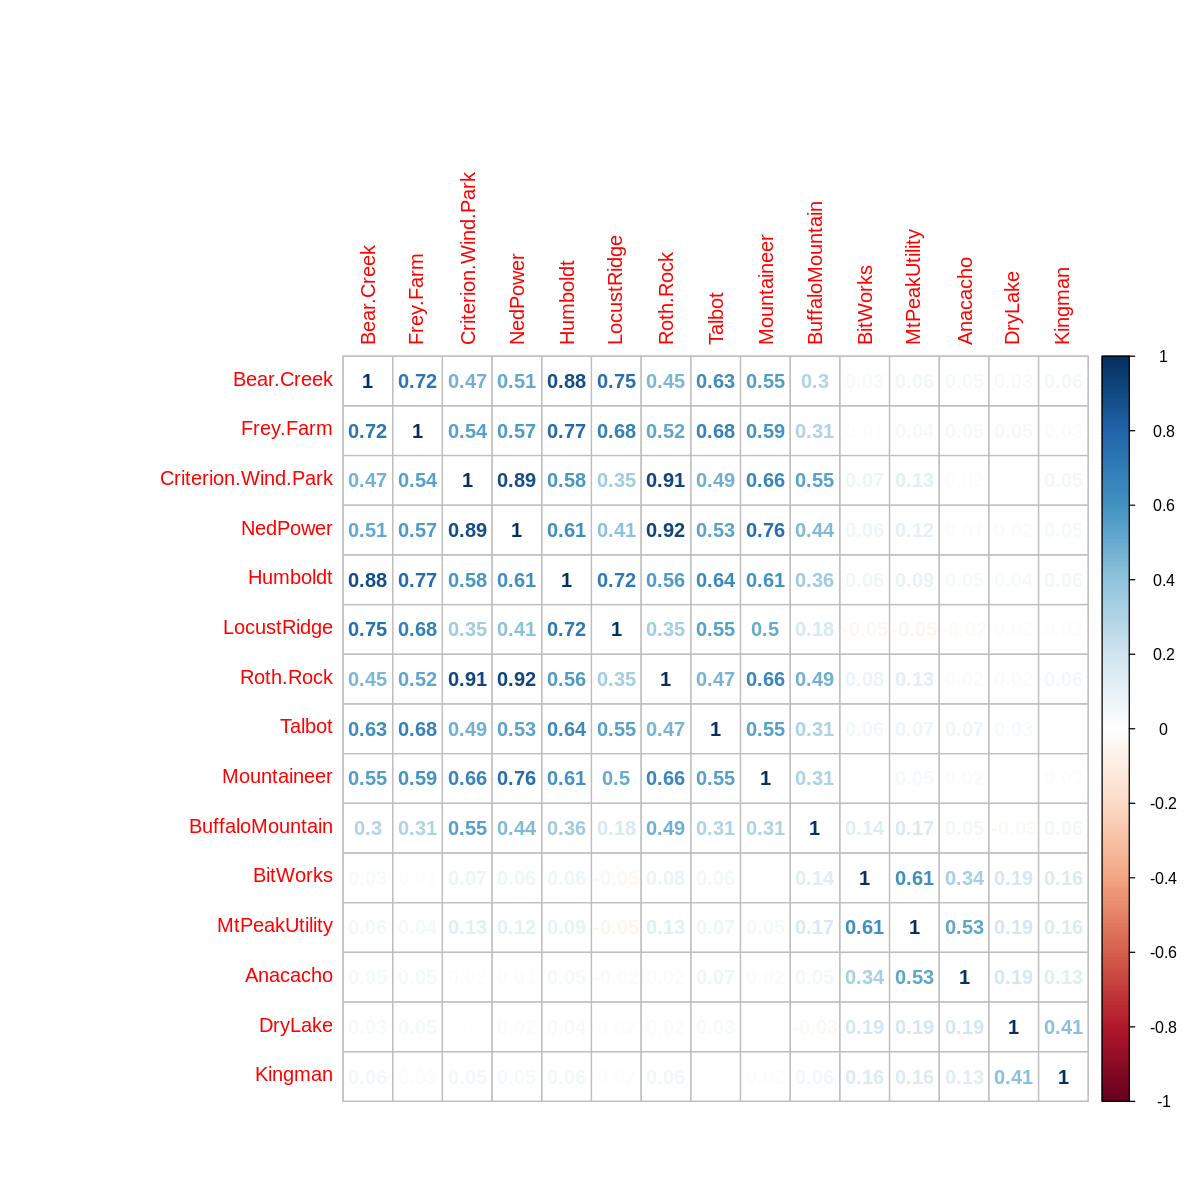

In [ ]:
#plot the correlation of the variable
library(repr)
options(repr.plot.width=10,repr.plot.height=10)
corrplot(M,method = 'number')

In [ ]:
#define the most correlation variable
corr_high=dplyr::select(wind,c(5,4,3,7,2,1,9,6,12))
print(head(corr_high,2))

  Humboldt NedPower Criterion.Wind.Park Roth.Rock Frey.Farm Bear.Creek
1    10.14    10.33                9.80      8.30      4.40       8.73
2     7.73    10.51                9.84      9.11      5.16       7.37
  Mountaineer LocustRidge MtPeakUtility
1        9.60        7.73         16.72
2        9.26        9.13         17.27


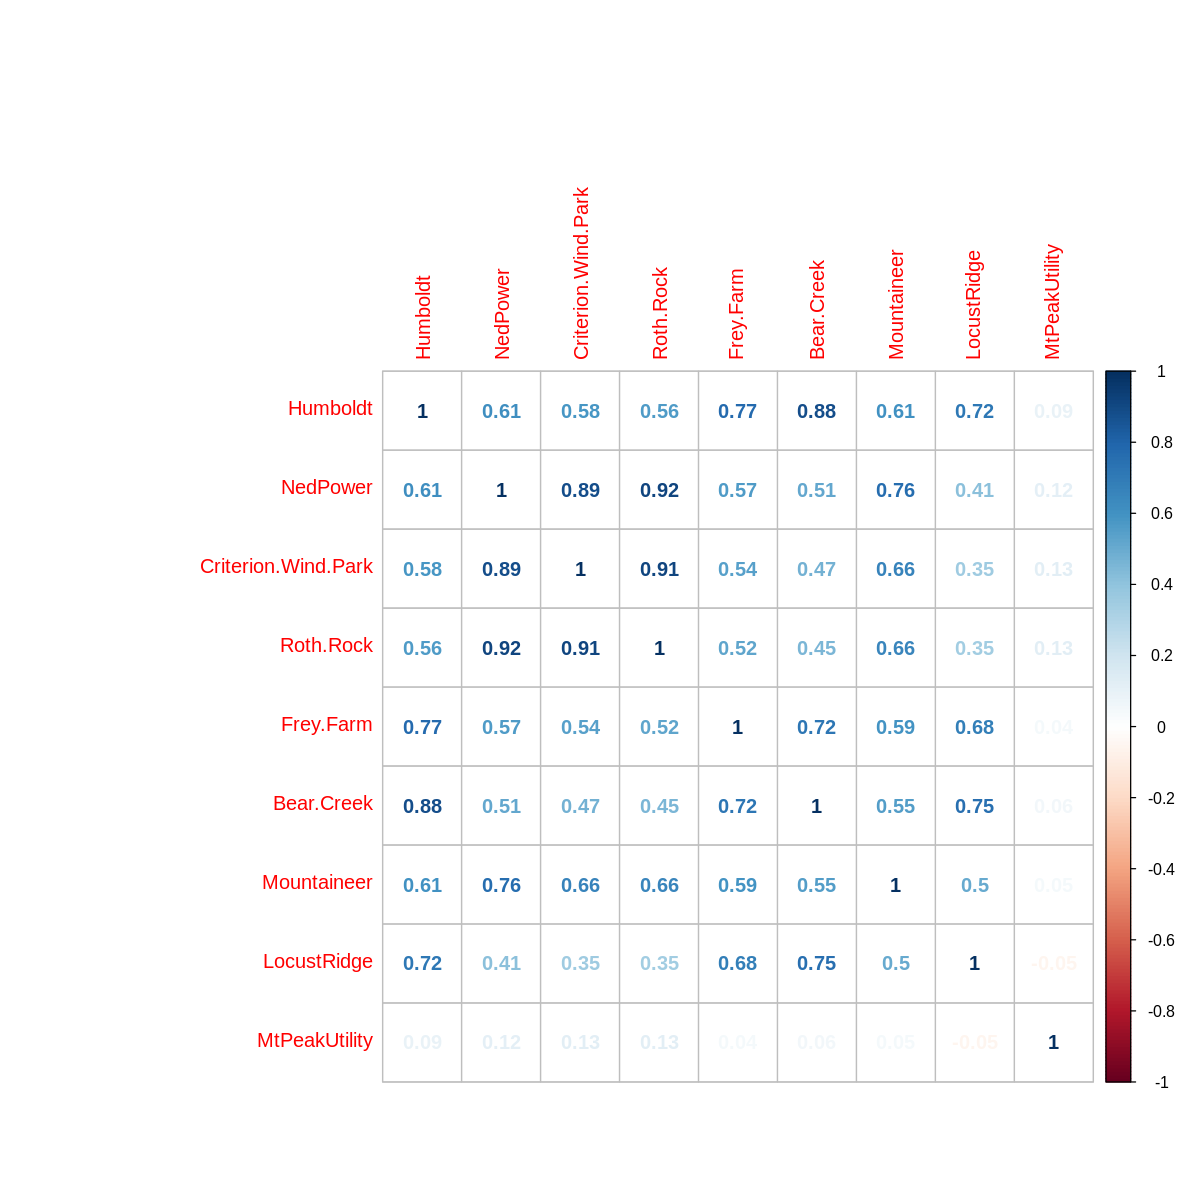

In [ ]:
#correlation matrix of the high
corh=cor(corr_high)
corrplot(corh,method = 'number')

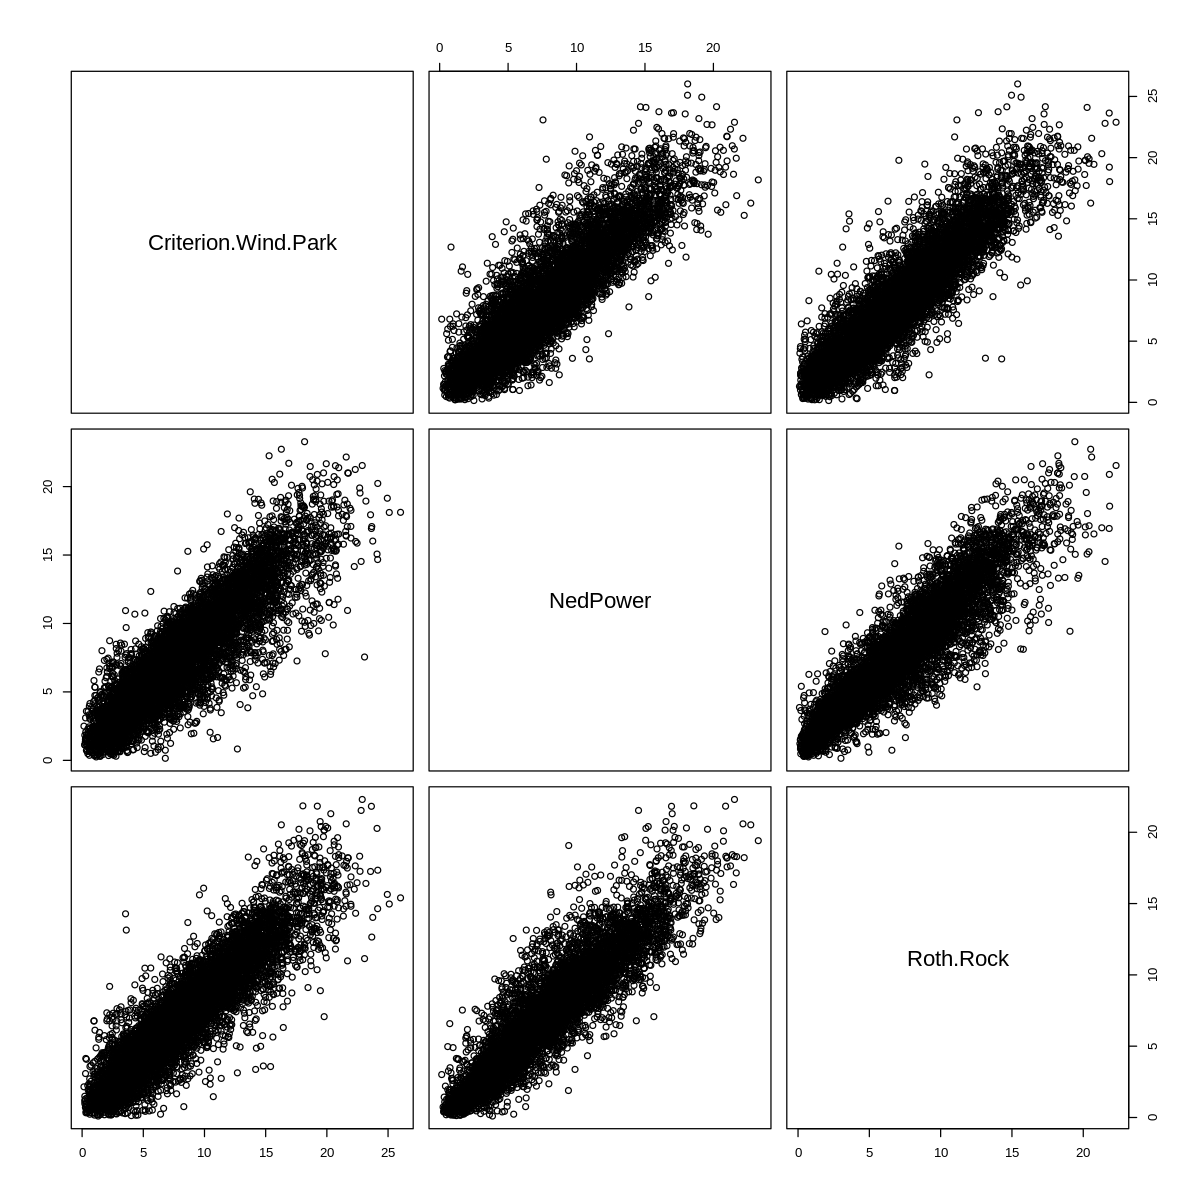

In [ ]:
#scatter plot
high=corr_high%>% dplyr::select(Criterion.Wind.Park,NedPower,Roth.Rock)
pairs(high)

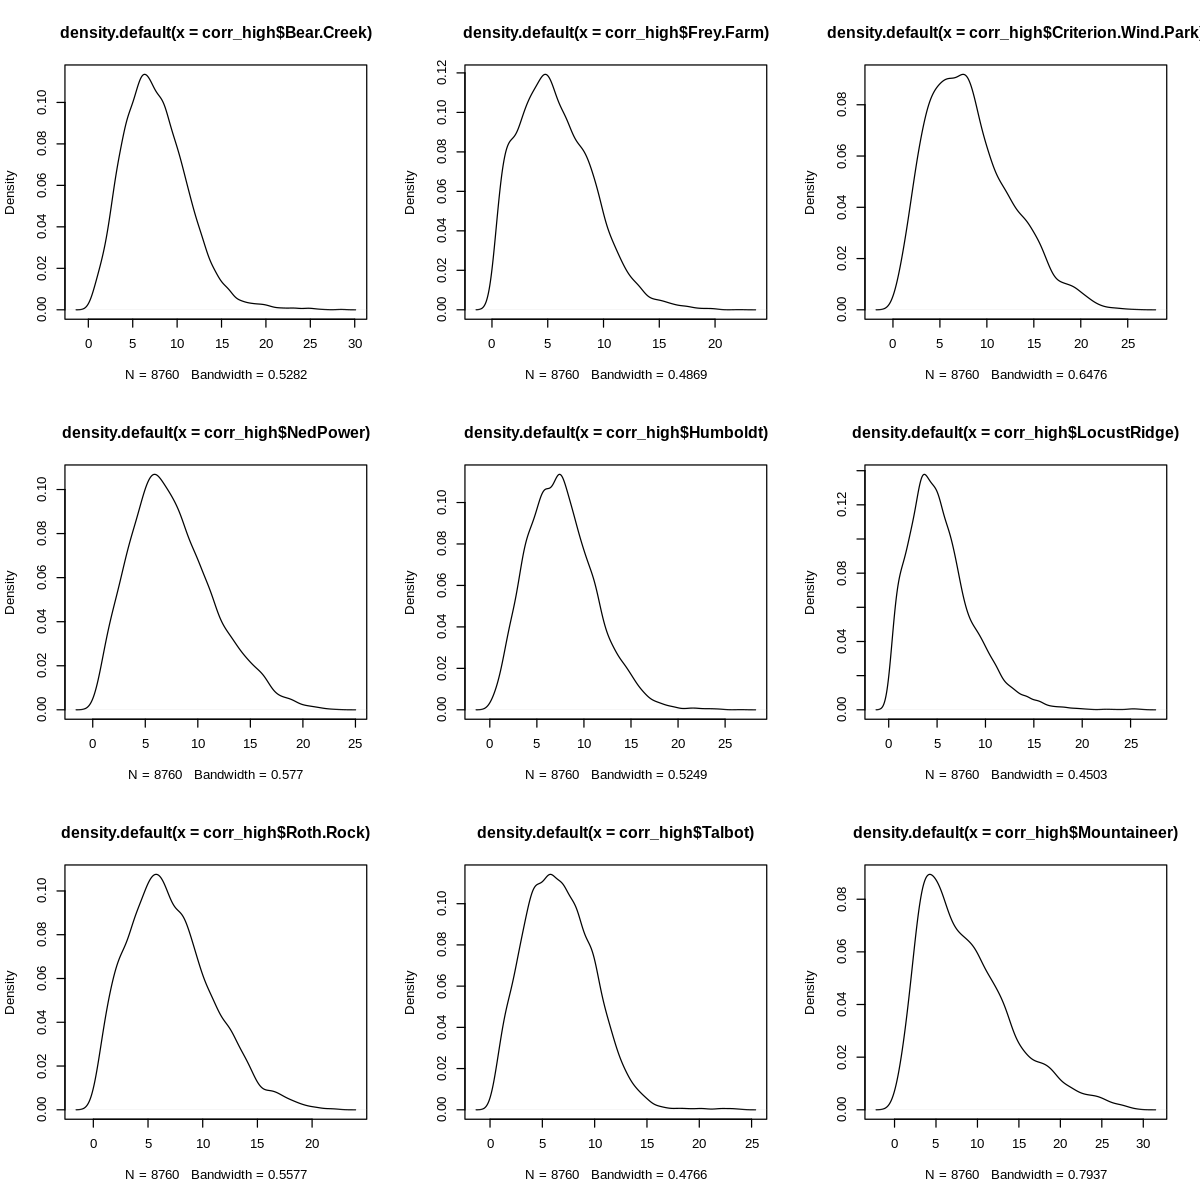

In [ ]:
#density plot
par(mfrow = c(3,3))
plot(density(corr_high$Bear.Creek))
plot(density(corr_high$Frey.Farm))
plot(density(corr_high$Criterion.Wind.Park))
plot(density(corr_high$NedPower))
plot(density(corr_high$Humboldt))
plot(density(corr_high$LocustRidge))
plot(density(corr_high$Roth.Rock))
plot(density(corr_high$Talbot))
plot(density(corr_high$Mountaineer))

In [ ]:
#descriptive statistics
summary(corr_high,mean=TRUE)

   Bear.Creek       Frey.Farm      Criterion.Wind.Park    NedPower     
 Min.   : 0.210   Min.   : 0.040   Min.   : 0.150      Min.   : 0.150  
 1st Qu.: 5.027   1st Qu.: 3.190   1st Qu.: 4.848      1st Qu.: 4.760  
 Median : 7.270   Median : 5.350   Median : 7.605      Median : 7.150  
 Mean   : 7.665   Mean   : 5.731   Mean   : 8.230      Mean   : 7.664  
 3rd Qu.: 9.860   3rd Qu.: 7.950   3rd Qu.:10.980      3rd Qu.:10.092  
 Max.   :28.510   Max.   :22.170   Max.   :26.020      Max.   :23.280  
    Humboldt       LocustRidge       Roth.Rock          Talbot      
 Min.   : 0.120   Min.   : 0.050   Min.   : 0.100   Min.   : 0.100  
 1st Qu.: 5.040   1st Qu.: 3.030   1st Qu.: 4.188   1st Qu.: 4.190  
 Median : 7.355   Median : 4.850   Median : 6.585   Median : 6.400  
 Mean   : 7.656   Mean   : 5.407   Mean   : 7.046   Mean   : 6.634  
 3rd Qu.: 9.890   3rd Qu.: 7.150   3rd Qu.: 9.412   3rd Qu.: 8.810  
 Max.   :26.660   Max.   :26.230   Max.   :22.300   Max.   :23.950  
  Mountaineer

In [ ]:
print('                                      Mean                             ')
print(round(sapply(corr_high,mean),2))
print('                                     Median                            ')
print(round(sapply(corr_high,median),2))

[1] "                                      Mean                             "
         Bear.Creek           Frey.Farm Criterion.Wind.Park            NedPower 
               7.66                5.73                8.23                7.66 
           Humboldt         LocustRidge           Roth.Rock              Talbot 
               7.66                5.41                7.05                6.63 
        Mountaineer 
               8.75 
[1] "                                     Median                            "
         Bear.Creek           Frey.Farm Criterion.Wind.Park            NedPower 
               7.27                5.35                7.61                7.15 
           Humboldt         LocustRidge           Roth.Rock              Talbot 
               7.36                4.85                6.58                6.40 
        Mountaineer 
               7.68 


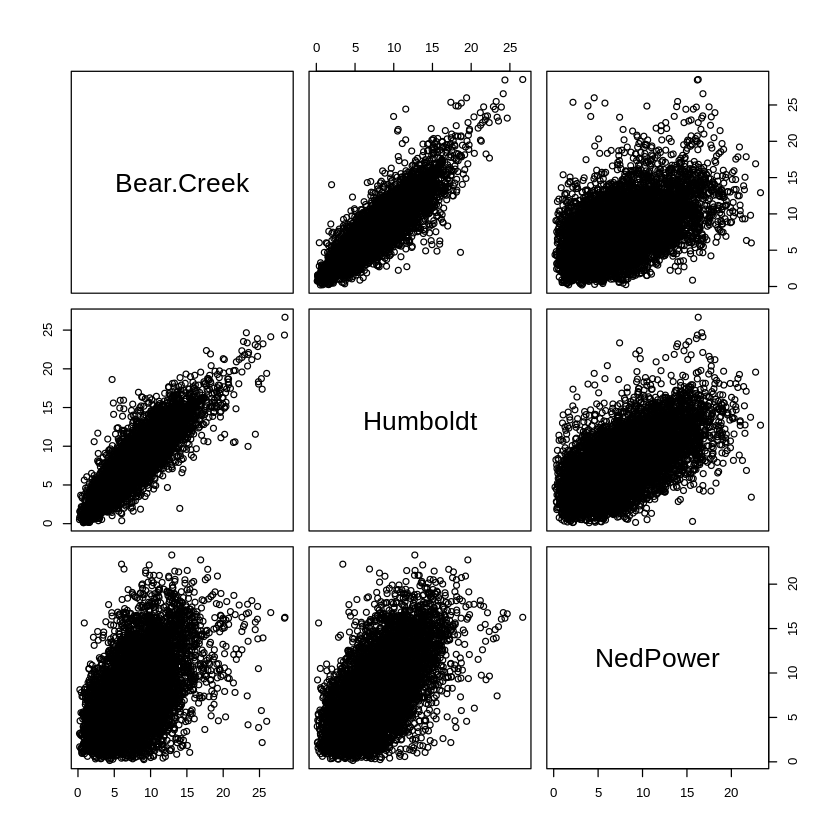

In [ ]:
#second high
high1=corr_high%>% dplyr::select(Bear.Creek,Humboldt,NedPower)
pairs(high1)

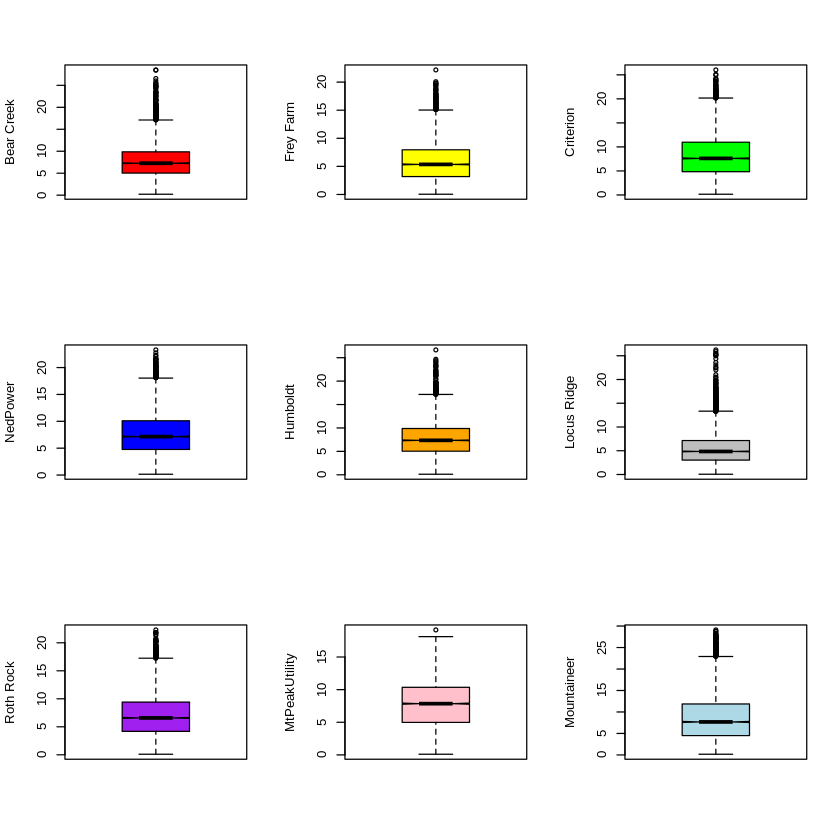

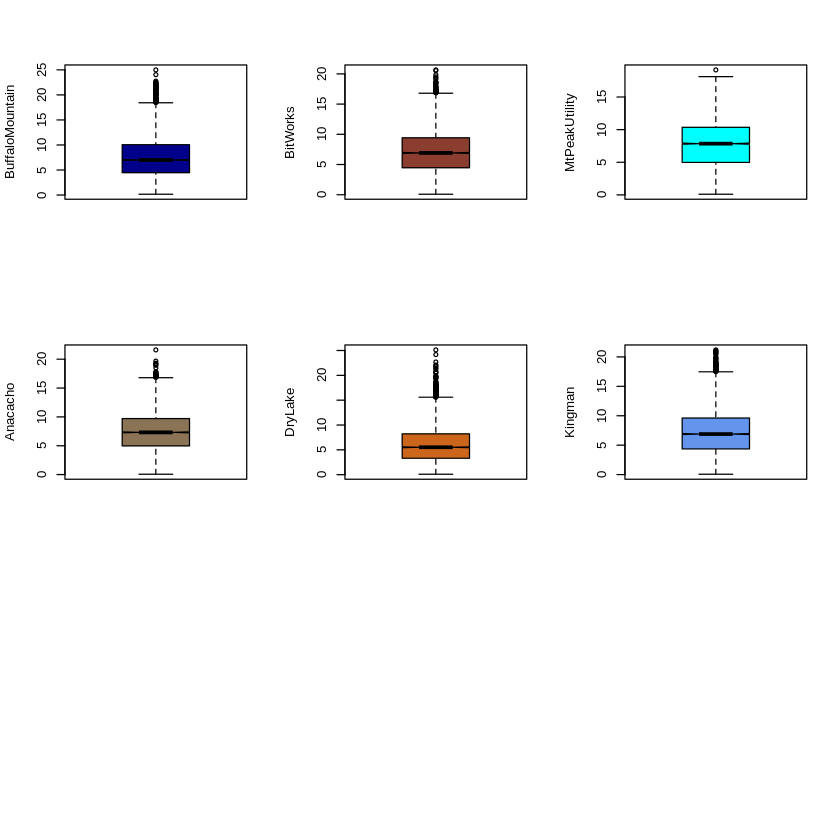

In [ ]:
#boxplot
par(mfrow = c(3,3))
boxplot(corr_high$Bear.Creek,ylab='Bear Creek',col = 'red',notch = TRUE)
boxplot(corr_high$Frey.Farm,ylab='Frey Farm',col = 'yellow',notch = TRUE)
boxplot(corr_high$Criterion.Wind.Park,ylab='Criterion',col = 'green',notch = TRUE)
boxplot(corr_high$NedPower,ylab='NedPower',col = 'blue',notch = TRUE)
boxplot(corr_high$Humboldt,ylab='Humboldt',col = 'orange',notch = TRUE)
boxplot(corr_high$LocustRidge,ylab='Locus Ridge',col = 'gray',notch = TRUE)
boxplot(corr_high$Roth.Rock,ylab='Roth Rock',col = 'purple',notch = TRUE)
boxplot(corr_high$MtPeakUtility, ylab='MtPeakUtility',col = 'pink',notch = TRUE)
boxplot(corr_high$Mountaineer,ylab='Mountaineer',col = 'light blue',notch = TRUE)
boxplot(wind$BuffaloMountain,ylab='BuffaloMountain',col = 'blue4' ,notch = TRUE)
boxplot(wind$BitWorks,ylab='BitWorks',col = 'coral4',notch = TRUE)
boxplot(wind$MtPeakUtility,ylab='MtPeakUtility',col = 'cyan',notch = TRUE)
boxplot(wind$Anacacho,ylab='Anacacho',col = 'burlywood4',notch = TRUE)
boxplot(wind$DryLake,ylab='DryLake',col = 'chocolate3',notch = TRUE)
boxplot(wind$Kingman,ylab='Kingman',col = 'cornflowerblue',notch = TRUE)

In [ ]:
#OLS regression
model<-lm(Roth.Rock~NedPower+Humboldt+Talbot+Mountaineer+Bear.Creek
+Frey.Farm+Criterion.Wind.Park+LocustRidge,
           data=corr_high)
print(summary(model))


Call:
lm(formula = Roth.Rock ~ NedPower + Humboldt + Talbot + Mountaineer + 
    Bear.Creek + Frey.Farm + Criterion.Wind.Park + LocustRidge, 
    data = corr_high)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6764 -0.6612 -0.0168  0.6382  8.5489 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.174108   0.036349   4.790 1.70e-06 ***
NedPower             0.555563   0.008776  63.302  < 2e-16 ***
Humboldt             0.030019   0.009443   3.179  0.00148 ** 
Talbot              -0.025538   0.006092  -4.192 2.79e-05 ***
Mountaineer         -0.052538   0.004182 -12.563  < 2e-16 ***
Bear.Creek          -0.036531   0.008647  -4.225 2.42e-05 ***
Frey.Farm            0.013587   0.007321   1.856  0.06349 .  
Criterion.Wind.Park  0.392295   0.006851  57.262  < 2e-16 ***
LocustRidge         -0.002375   0.006611  -0.359  0.71941    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.279 on 8751

In [ ]:
print(head(wind,2))

  Bear.Creek Frey.Farm Criterion.Wind.Park NedPower Humboldt LocustRidge
1       8.73      4.40                9.80    10.33    10.14        7.73
2       7.37      5.16                9.84    10.51     7.73        9.13
  Roth.Rock Talbot Mountaineer BuffaloMountain BitWorks MtPeakUtility Anacacho
1      8.30   7.07        9.60           13.25     9.56         16.72     1.44
2      9.11   6.65        9.26           12.68    13.65         17.27     3.89
  DryLake Kingman
1    4.64   10.89
2    2.12   10.36


In [ ]:
#features selections
# ensure the results are repeatable
set.seed(7)
# load the library
# calculate correlation matrix
correlationMatrix <- cor(wind)
# summarize the correlation matrix
#print(correlationMatrix)
# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5)
# print indexes of highly correlated attributes
print(highlyCorrelated)

[1]  5  4  3  7  2  1  9  6 12


Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees

In [ ]:
#gradient boosting machine()

install.packages('gbm')
library(gbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.1.8



Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       11.6253            -nan     0.1000    1.2007
     2       10.6238            -nan     0.1000    1.0307
     3        9.7557            -nan     0.1000    0.8527
     4        8.9948            -nan     0.1000    0.7667
     5        8.3464            -nan     0.1000    0.6259
     6        7.7713            -nan     0.1000    0.5888
     7        7.2729            -nan     0.1000    0.4979
     8        6.8403            -nan     0.1000    0.4230
     9        6.4372            -nan     0.1000    0.4098
    10        6.1001            -nan     0.1000    0.3344
    20        3.9400            -nan     0.1000    0.1282
    40        2.5622            -nan     0.1000    0.0311
    60        2.1765            -nan     0.1000    0.0091
    80        2.0440            -nan     0.1000    0.0034
   100        1.9918            -nan     0.1000    0.0007
   120        1.9671            -nan     0.1000   -0.0010
   140        

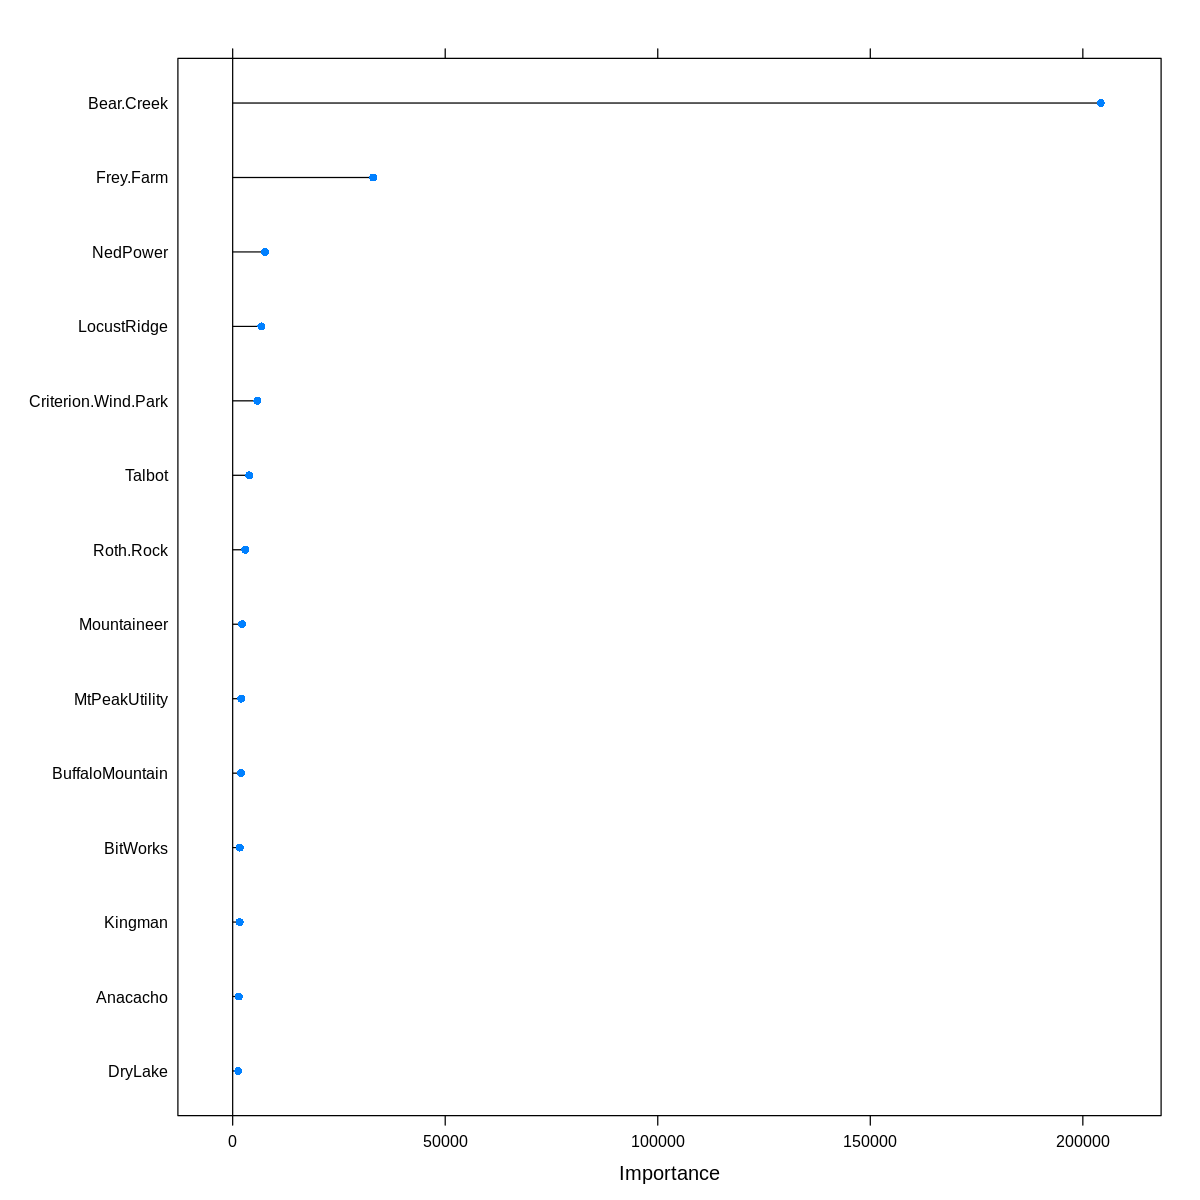

In [ ]:
#Rank Features by importance
set.seed(7)
# prepare training scheme
control <- trainControl(method="repeatedcv", number=10, repeats=3)
# train the model
model <- train(Humboldt~., data=wind[,1:15], method="gbm", trControl=control,tuneLength =5)
# estimate variable importance
importance <- varImp(model, scale=FALSE)
# summarize importance
print(importance)
# plot importance
plot(importance)

In [ ]:
install.packages('randomForest')
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine





Recursive feature selection

Outer resampling method: Cross-Validated (10 fold) 

Resampling performance over subset size:

 Variables  RMSE Rsquared   MAE  RMSESD RsquaredSD   MAESD Selected
         1 1.822   0.7431 1.378 0.07530    0.02209 0.04790         
         2 1.649   0.7885 1.238 0.07355    0.01954 0.04394         
         3 1.545   0.8141 1.151 0.05644    0.01308 0.03033         
         4 1.452   0.8359 1.079 0.06498    0.01464 0.04199         
         6 1.389   0.8499 1.028 0.06500    0.01449 0.04065         
         7 1.363   0.8559 1.008 0.06367    0.01386 0.03609         
         8 1.359   0.8570 1.007 0.06383    0.01379 0.03696        *

The top 5 variables (out of 8):
   Bear.Creek, Frey.Farm, LocustRidge, Roth.Rock, Criterion.Wind.Park



[1] "Bear.Creek"          "Frey.Farm"           "LocustRidge"        
[4] "Roth.Rock"           "Criterion.Wind.Park" "MtPeakUtility"      
[7] "Mountaineer"         "NedPower"

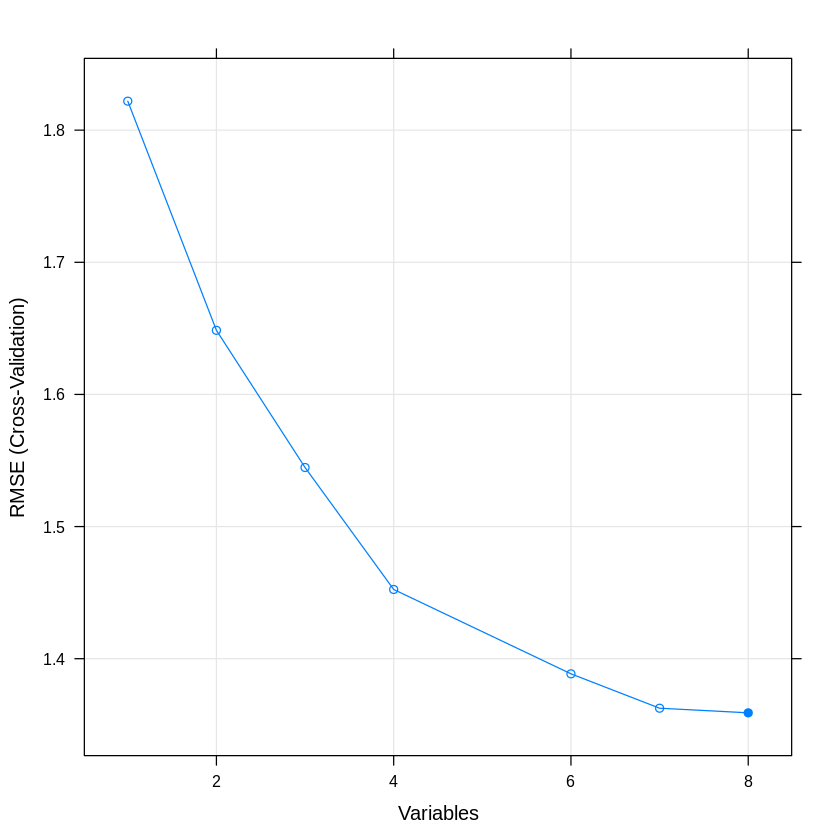

In [ ]:
#feature selection
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# run the RFE algorithm
results <- rfe(wind[,c(4,3,7,2,1,9,6,12)], wind[,'Humboldt'], sizes=c(4,3,7,2,1,9,6,12), rfeControl=control)
# summarize the results
print(results)
# list the chosen features
predictors(results)
# plot the results
plot(results, type=c("g", "o"))

In [ ]:
#Model Training and Parameter Tuning
set.seed(998)
inTraining <- createDataPartition(wind$Humboldt, p = .75, list = FALSE)
training <- wind[ inTraining,]
testing  <- wind[-inTraining,]

In [ ]:
#gradient boosting machine()
set.seed(825)
gbmFit1 <- train(Humboldt ~ ., data =training, 
                 method = "gbm", 
                 trControl = control,
                 ## This last option is actually one
                 ## for gbm() that passes through
                 verbose = FALSE)
gbmFit1

Stochastic Gradient Boosting 

6572 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5915, 5915, 5914, 5915, 5914, 5915, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                   50      1.548950  0.8267187  1.181568
  1                  100      1.450147  0.8380984  1.099880
  1                  150      1.441472  0.8397266  1.087821
  2                   50      1.463449  0.8362436  1.110487
  2                  100      1.438869  0.8403312  1.084280
  2                  150      1.431515  0.8419484  1.077251
  3                   50      1.443593  0.8396726  1.092964
  3                  100      1.427848  0.8427619  1.074520
  3                  150      1.421439  0.8441217  1.068572

Tuning parameter 'shrinkage' was held constant at a value of 0.1

Tuning parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to 

In [ ]:
gbmGrid <-  expand.grid(interaction.depth = c(1, 5, 9), 
                        n.trees = (1:30)*50, 
                        shrinkage = 0.1,
                        n.minobsinnode = 20)
                        
nrow(gbmGrid)

set.seed(825)
gbmFit3 <- train(Humboldt ~ ., data = wind, 
                 method = "gbm", 
                 trControl = control, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit3


[1] 90

Stochastic Gradient Boosting 

8760 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 7884, 7886, 7884, 7884, 7884, 7883, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE      
  1                    50     1.559484  0.8234252  1.1811472
  1                   100     1.459970  0.8344835  1.0997961
  1                   150     1.450608  0.8362416  1.0871998
  1                   200     1.447752  0.8368902  1.0837909
  1                   250     1.446828  0.8371204  1.0818135
  1                   300     1.446093  0.8372800  1.0807327
  1                   350     1.445968  0.8373346  1.0802488
  1                   400     1.445345  0.8374722  1.0795009
  1                   450     1.444939  0.8375678  1.0788679
  1                   500     1.444382  0.8376769  1.0782567
  1                   550     1.443883  0.8377764  1.0776468
  1                  

In [ ]:
set.seed(825)
gbmFit4 <- train(Humboldt ~ ., data = training, 
                 method = "gbm", 
                 trControl = control, 
                 verbose = FALSE, 
                 ## Now specify the exact models 
                 ## to evaluate:
                 tuneGrid = gbmGrid)
gbmFit4


Stochastic Gradient Boosting 

6572 samples
  14 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 5915, 5915, 5914, 5915, 5914, 5915, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  RMSE      Rsquared   MAE     
  1                    50     1.548581  0.8265139  1.179713
  1                   100     1.453739  0.8372566  1.101661
  1                   150     1.445787  0.8388363  1.090722
  1                   200     1.443585  0.8392938  1.088282
  1                   250     1.442401  0.8395394  1.086309
  1                   300     1.442459  0.8395408  1.085511
  1                   350     1.441232  0.8398152  1.084335
  1                   400     1.441154  0.8398327  1.083822
  1                   450     1.440672  0.8399388  1.083157
  1                   500     1.440648  0.8399119  1.083052
  1                   550     1.440819  0.8399005  1.082748
  1                   600     1.4

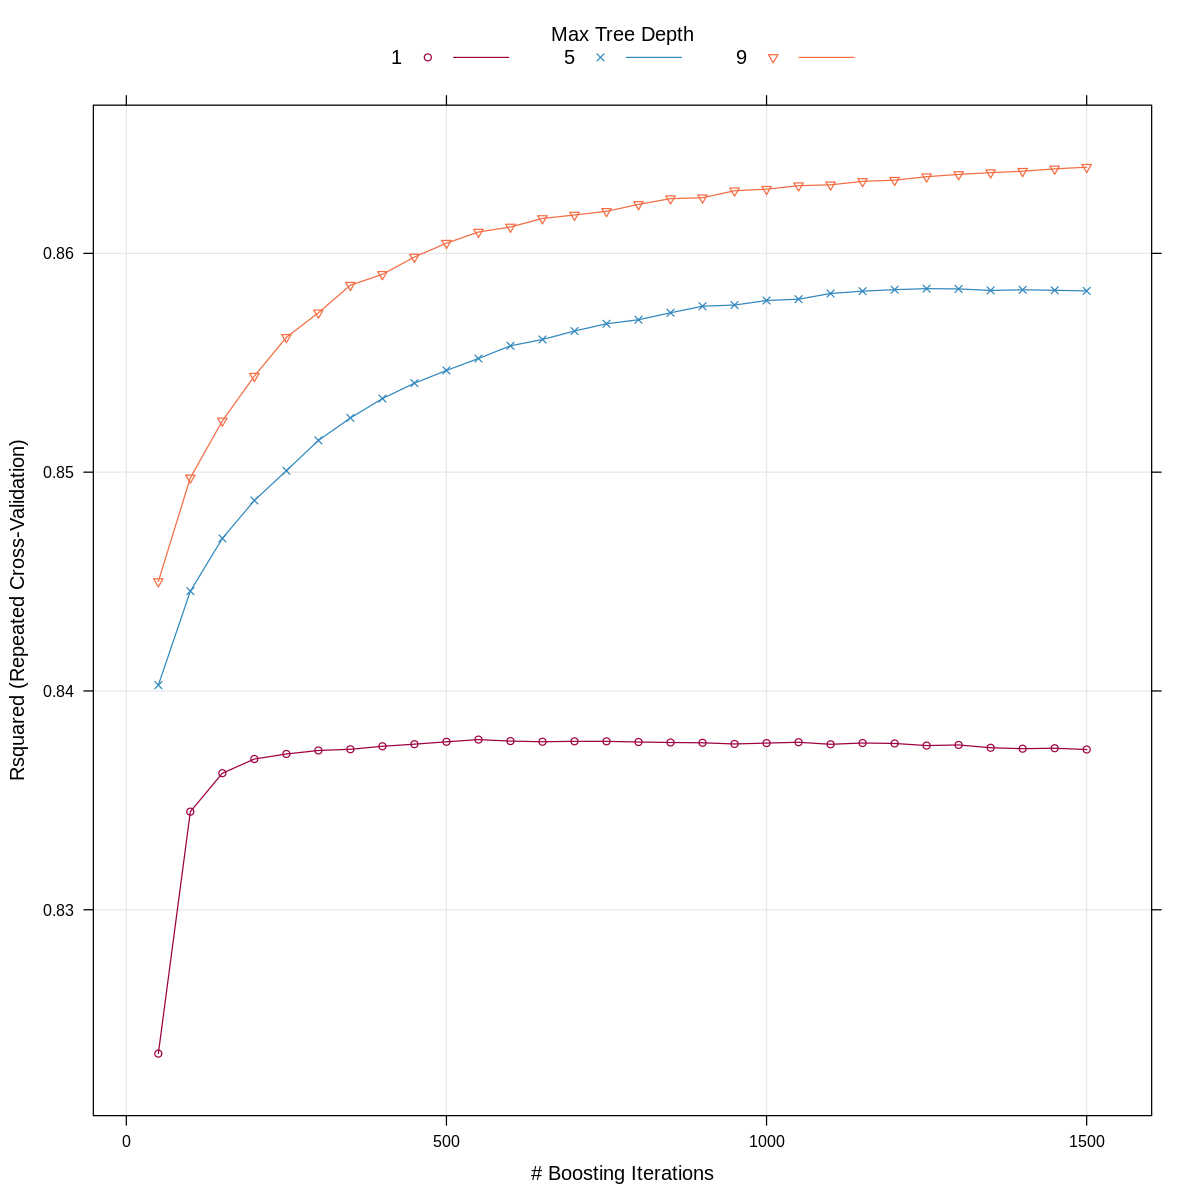

In [ ]:
#plotting
trellis.par.set(caretTheme())
plot(gbmFit3,metric='Rsquared')  

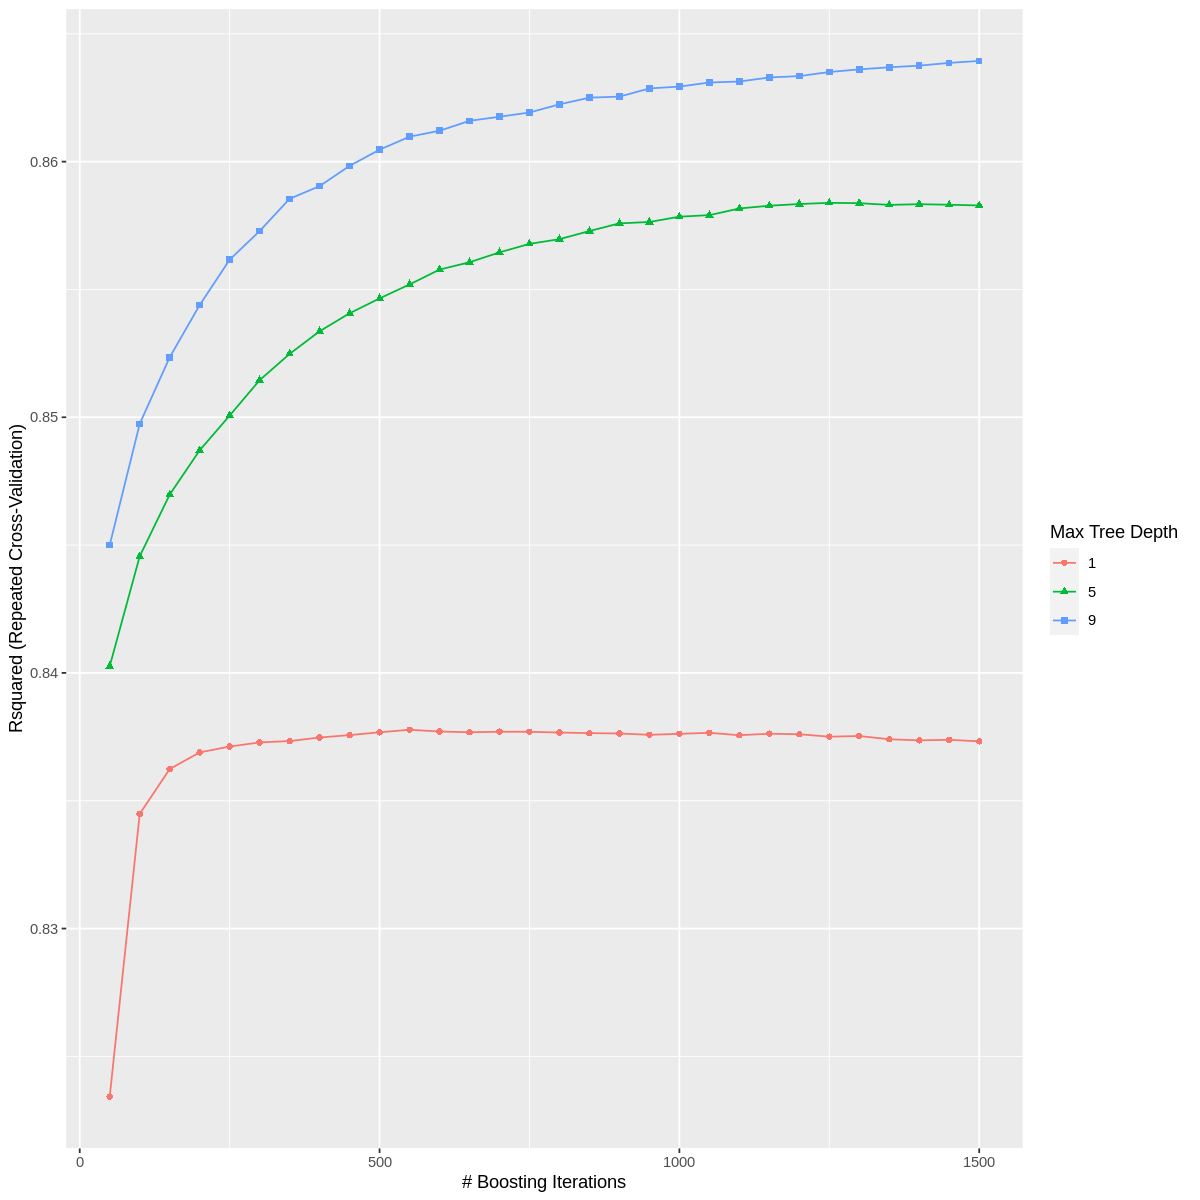

In [ ]:
#plot
ggplot(gbmFit3,metric = 'Rsquared')

In [ ]:
whichTwoPct <- tolerance(gbmFit3$results, metric = "Rsquared", 
                         tol = 2, maximize = TRUE)  
cat("best model within 2 pct of best:\n")

best model within 2 pct of best:


In [ ]:
print(gbmFit3$results[whichTwoPct,1:6])

   shrinkage interaction.depth n.minobsinnode n.trees     RMSE  Rsquared
62       0.1                 9             20     100 1.389159 0.8497426


In [ ]:
attach(wind)
names(wind)

[1] "Bear.Creek"          "Frey.Farm"           "Criterion.Wind.Park"
 [4] "NedPower"            "Humboldt"            "LocustRidge"        
 [7] "Roth.Rock"           "Talbot"              "Mountaineer"        
[10] "BuffaloMountain"     "BitWorks"            "MtPeakUtility"      
[13] "Anacacho"            "DryLake"             "Kingman"

In [ ]:
# Humboldt, LocustRidge, Talbot, Frey.Farm, BuffaloMountain
#Bayesian regression and OLS regression
#1-) OLS regression
ols1=lm(Bear.Creek~ Humboldt+ LocustRidge + Talbot + Frey.Farm + BuffaloMountain,
data=wind)
summary(ols1)


Call:
lm(formula = Bear.Creek ~ Humboldt + LocustRidge + Talbot + Frey.Farm + 
    BuffaloMountain, data = wind)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7932  -0.8912  -0.0374   0.8891  13.4696 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.5704851  0.0469156  12.160   <2e-16 ***
Humboldt        0.6812545  0.0085902  79.306   <2e-16 ***
LocustRidge     0.2499657  0.0077006  32.461   <2e-16 ***
Talbot          0.0758692  0.0074099  10.239   <2e-16 ***
Frey.Farm       0.0038099  0.0089445   0.426    0.670    
BuffaloMountain 0.0003004  0.0046208   0.065    0.948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.591 on 8754 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8093 
F-statistic:  7436 on 5 and 8754 DF,  p-value: < 2.2e-16


In [ ]:
#what is the 95 % posterior marginal distribution for each predictor
#humboldt
round(0.570144+0.007546*qt(.975,8756),2)
round(0.570144-0.007546*qt(.975,8756),2)

[1] 0.58

[1] 0.56

In [ ]:
round(coef(ols1),3)

(Intercept)        Humboldt     LocustRidge          Talbot       Frey.Farm 
          0.570           0.681           0.250           0.076           0.004 
BuffaloMountain 
          0.000

In [ ]:
#prediction
print(tail(predict(ols1,data.frame(wind$Bear.Creek),interval = "predict"),20))

           fit      lwr      upr
8741 10.747168 7.626386 13.86795
8742 11.376003 8.254878 14.49713
8743 10.853356 7.732084 13.97463
8744 10.448971 7.328508 13.56943
8745 10.452436 7.331963 13.57291
8746  9.291854 6.172075 12.41163
8747  8.842138 5.722344 11.96193
8748  8.193057 5.074051 11.31206
8749  7.719193 4.600339 10.83805
8750  8.428338 5.309226 11.54745
8751  9.019209 5.899711 12.13871
8752  8.347778 5.228903 11.46665
8753  9.236829 6.118015 12.35564
8754  9.712854 6.593993 12.83172
8755  9.949162 6.830271 13.06805
8756 10.724207 7.605087 13.84333
8757 11.116945 7.997927 14.23596
8758 10.761324 7.642017 13.88063
8759  9.838889 6.719856 12.95792
8760  9.763252 6.643182 12.88332


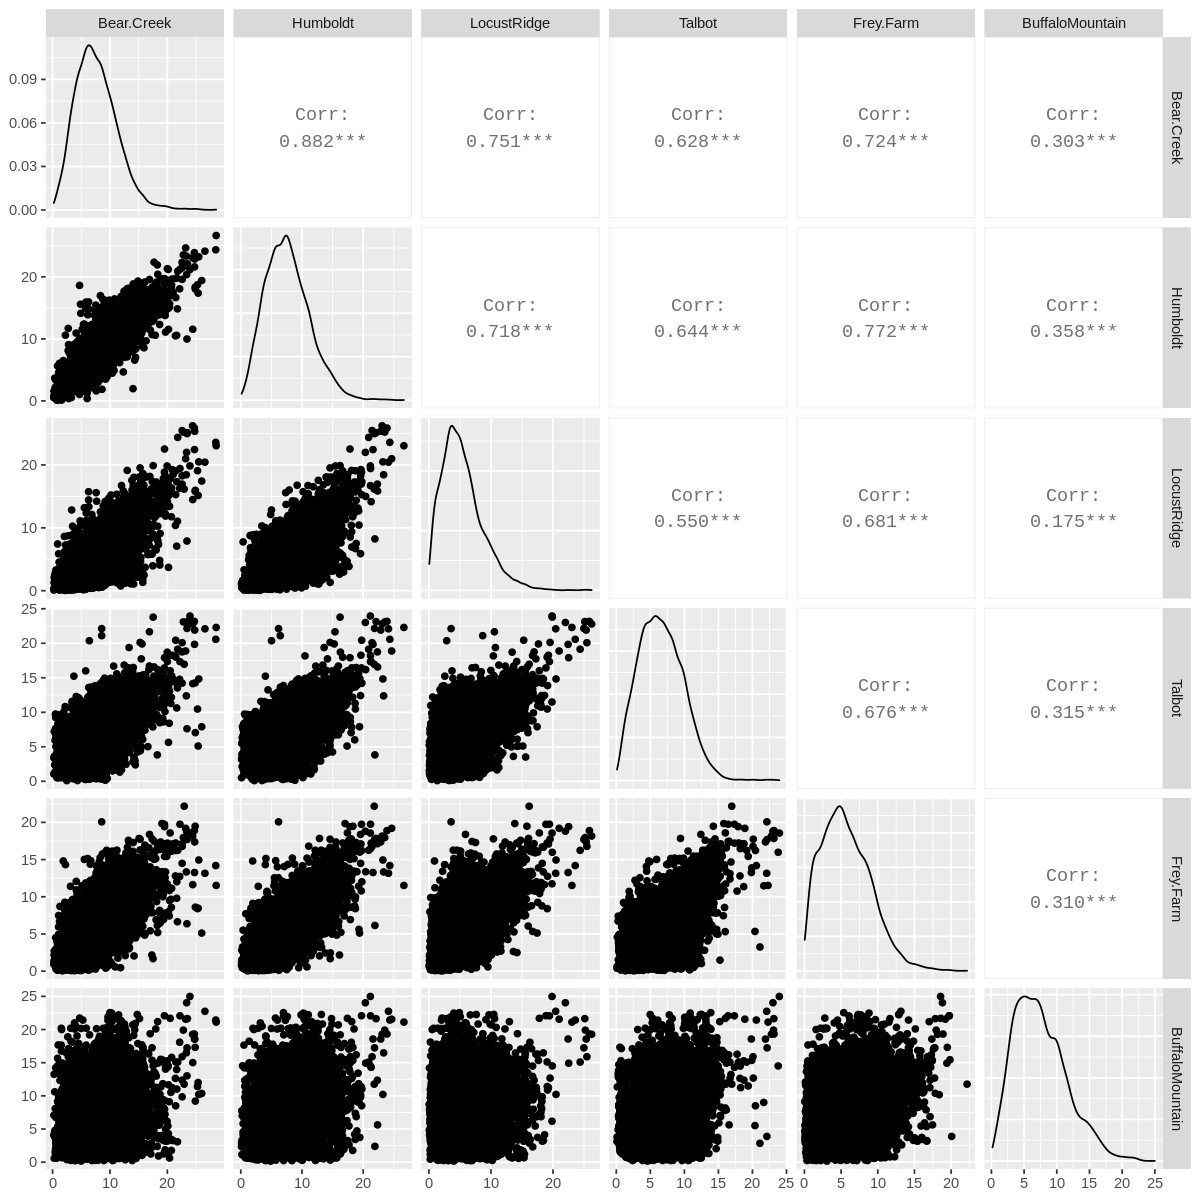

In [ ]:
good1=wind%>%dplyr::select(Bear.Creek,Humboldt,LocustRidge,Talbot,Frey.Farm,BuffaloMountain)
ggpairs(good1)

In [ ]:
attach(wind)
names(wind)

[1] "Bear.Creek"          "Frey.Farm"           "Criterion.Wind.Park"
 [4] "NedPower"            "Humboldt"            "LocustRidge"        
 [7] "Roth.Rock"           "Talbot"              "Mountaineer"        
[10] "BuffaloMountain"     "BitWorks"            "MtPeakUtility"      
[13] "Anacacho"            "DryLake"             "Kingman"

working on the prediction of the model and plot the resulting line of best fit 

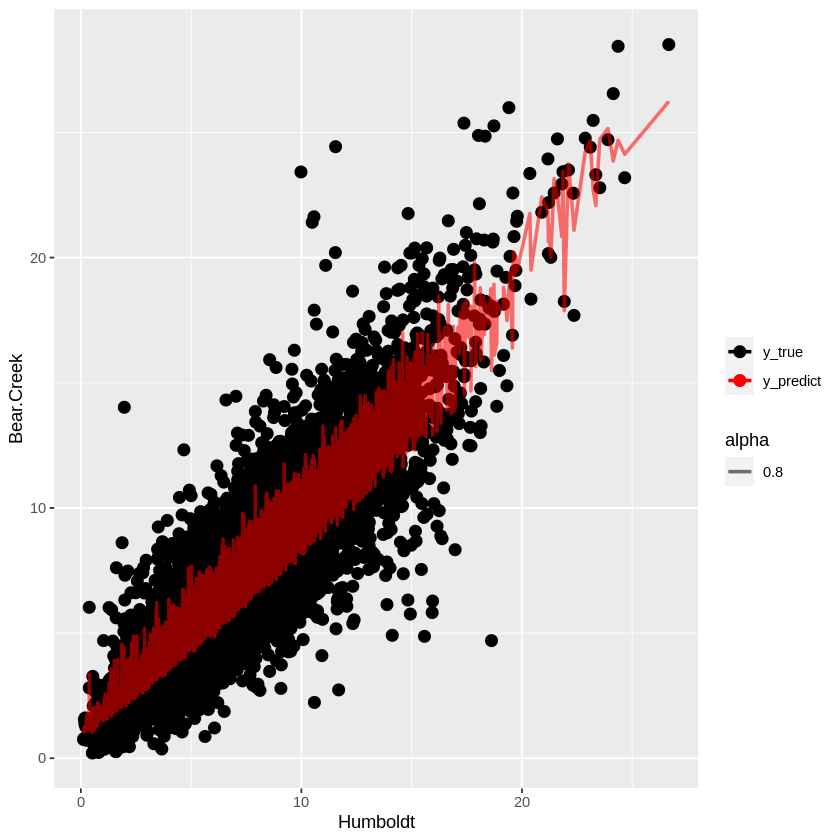

In [ ]:
# Set up dataframe containing predictions
predict = data.frame(predict(ols1))
predict$x = Humboldt
names(predict) = c('y', 'x')
 
# Plot data and predictions
p = ggplot() + geom_point(data =wind, aes(Humboldt, Bear.Creek, color='black'), size=3)
p = p + geom_line(data = predict, aes(x=x, y=y, color ='red', alpha=0.8), size=1)
p + scale_colour_manual(name='', values=c('black', 'red'), labels=c('y_true', 'y_predict'))

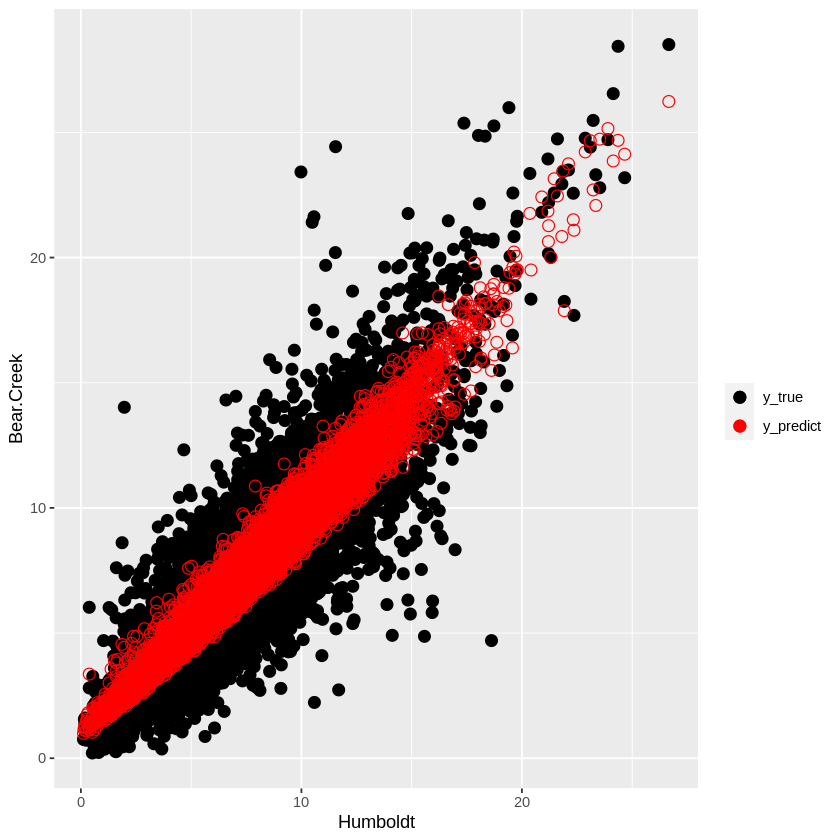

In [ ]:
p = ggplot() + geom_point(data = wind, aes(Humboldt, Bear.Creek, color='black'), size=3)
p = p + geom_point(data = predict, aes(x=x, y=y, color ='red'), size=3, shape=1)
p + scale_colour_manual(name='', values=c('black', 'red'), labels=c('y_true', 'y_predict'))

The model above was trained on all of the features, but it may be better to use only a subset. One method of determining the optimal subset of features is with the stepAIC function, which attempts to minimize the Bayesian Information Criterion (BIC) metric. This metric ranks the models according to goodness of fit but includes a penalty for having more parameters that goes as log(n) where n is the number of parameters

Results below
As can be seen, the BIC was reduced by removing the “Examination” feature. After this step it was found that no lower value could be achieved by removing additional features and the algorithm ended

In [ ]:
stepAIC(lm(Bear.Creek~ Humboldt+ LocustRidge + Talbot + Frey.Farm + BuffaloMountain,
data=wind,k=log(nrow(rock))))

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘k’ will be disregarded”


Start:  AIC=8140.51
Bear.Creek ~ Humboldt + LocustRidge + Talbot + Frey.Farm + BuffaloMountain

                  Df Sum of Sq   RSS     AIC
- BuffaloMountain  1       0.0 22156  8138.5
- Frey.Farm        1       0.5 22156  8138.7
<none>                         22156  8140.5
- Talbot           1     265.3 22421  8242.8
- LocustRidge      1    2666.9 24823  9134.1
- Humboldt         1   15918.5 38074 12881.5


Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘k’ will be disregarded”



Step:  AIC=8138.51
Bear.Creek ~ Humboldt + LocustRidge + Talbot + Frey.Farm

              Df Sum of Sq   RSS     AIC
- Frey.Farm    1       0.5 22156  8136.7
<none>                     22156  8138.5
- Talbot       1     269.4 22425  8242.4
- LocustRidge  1    2731.4 24887  9154.9
- Humboldt     1   16671.9 38828 13051.1


Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘k’ will be disregarded”



Step:  AIC=8136.7
Bear.Creek ~ Humboldt + LocustRidge + Talbot

              Df Sum of Sq   RSS     AIC
<none>                     22156  8136.7
- Talbot       1     313.1 22470  8257.6
- LocustRidge  1    2926.7 25083  9221.5
- Humboldt     1   20728.3 42885 13919.7



Call:
lm(formula = Bear.Creek ~ Humboldt + LocustRidge + Talbot, data = wind, 
    k = log(nrow(rock)))

Coefficients:
(Intercept)     Humboldt  LocustRidge       Talbot  
     0.5701       0.6830       0.2507       0.0770  


Bayesian Linear regression
Let's use the same regression OLS model and analyse the distribution of the residuals

In [ ]:
#Compute the errors
errors = resid(ols1)
# Plot histogram and fitted line
as.data.frame(errors) %>% ggplot(aes(errors)) +
    geom_histogram(binwidth=1.5, aes(y=..density..)) +
    geom_density(adjust=1.2, size=1, color='red') +
    xlim(-23, 23)

ERROR: ignored

We assign now the prior to the parameters and use the likelihood function to determine the posterior using the bayes'rule

To implement this in R we’ll import the BAS library and use the bas.lm function to evaluate a set of Bayesian models containing different combinations of features. We can then make predictions using various combinations of the resulting models

In [ ]:
library(BAS) #

In [ ]:
wind.lm_bay = bas.lm(Bear.Creek~ Humboldt+ LocustRidge + Talbot + Frey.Farm + BuffaloMountain,
 data=wind,prior = 'BIC', modelprior = uniform())
wind.lm_bay


Call:
bas.lm(formula = Bear.Creek ~ Humboldt + LocustRidge + Talbot + 
    Frey.Farm + BuffaloMountain, data = wind, prior = "BIC", 
    modelprior = uniform())


 Marginal Posterior Inclusion Probabilities: 
      Intercept         Humboldt      LocustRidge           Talbot  
        1.00000          1.00000          1.00000          1.00000  
      Frey.Farm  BuffaloMountain  
        0.01158          0.01061  

In [ ]:
wind.lm_bay$priorprobs

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
print(wind.lm_bay$postprobs)

 [1]  0.000000e+00  0.000000e+00  0.000000e+00 8.387244e-250  0.000000e+00
 [6] 9.031370e-235  1.107761e-23  0.000000e+00 7.746148e-222  7.754105e-27
[11] 7.027125e-287 2.764742e-287  0.000000e+00  0.000000e+00  0.000000e+00
[16]  1.227125e-04  2.601867e-25 4.488595e-232 7.253880e-219  0.000000e+00
[21]  0.000000e+00  0.000000e+00  0.000000e+00 3.798435e-249  9.779277e-01
[26]  0.000000e+00  0.000000e+00  0.000000e+00  1.048859e-02  1.146101e-02
[31]  1.859288e-25  0.000000e+00


Here we see the models ranked by their posterior odds ratio where black squares indicate which features are being left out of each model. Just like our stepAIC linear model feature reduction earlier, “Examination” can be identified as a poor feature for making predictions about Bear.Creek.

In [ ]:
print(summary(wind.lm_bay))

                P(B != 0 | Y)    model 1    model 2    model 3    model 4
Intercept             1.00000  1.000e+00  1.000e+00  1.000e+00  1.000e+00
Humboldt              1.00000  1.000e+00  1.000e+00  1.000e+00  1.000e+00
LocustRidge           1.00000  1.000e+00  1.000e+00  1.000e+00  1.000e+00
Talbot                1.00000  1.000e+00  1.000e+00  1.000e+00  1.000e+00
Frey.Farm             0.01158  0.000e+00  1.000e+00  0.000e+00  1.000e+00
BuffaloMountain       0.01061  0.000e+00  0.000e+00  1.000e+00  1.000e+00
BF                         NA  1.000e+00  1.172e-02  1.073e-02  1.255e-04
PostProbs                  NA  9.779e-01  1.150e-02  1.050e-02  1.000e-04
R2                         NA  8.094e-01  8.094e-01  8.094e-01  8.094e-01
dim                        NA  4.000e+00  5.000e+00  5.000e+00  6.000e+00
logmarg                    NA -4.384e+04 -4.385e+04 -4.385e+04 -4.385e+04
                   model 5
Intercept        1.000e+00
Humboldt         1.000e+00
LocustRidge      1.000e+00
Talb

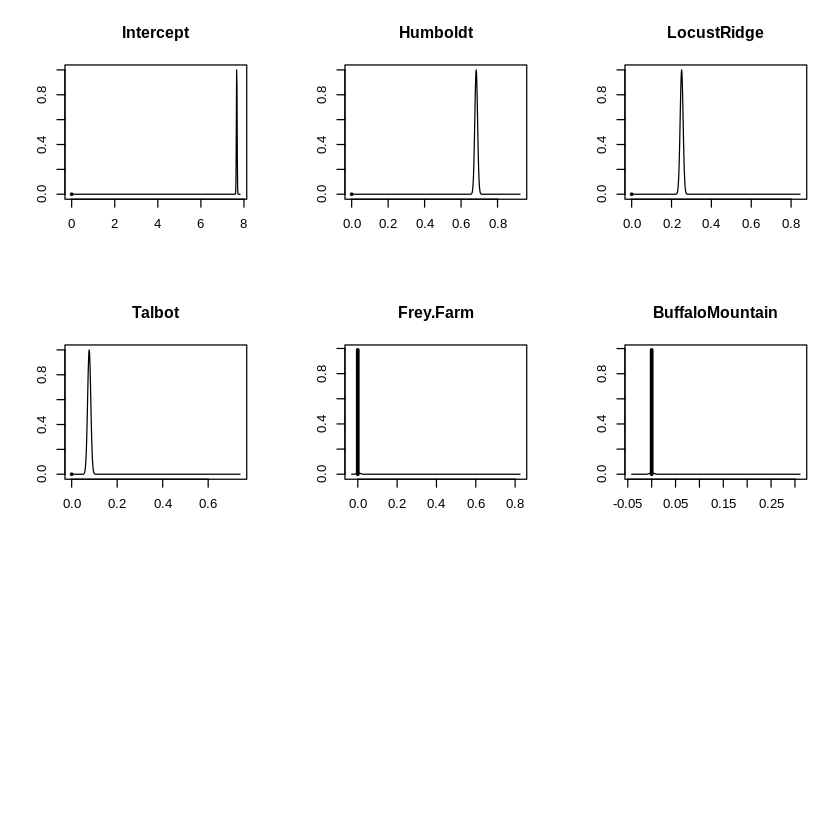

In [ ]:
par(mfrow = c(3,3))
plot(coefficients(wind.lm_bay))

Making prediction:
Since we didn’t hold out any data during training, we have nothing to test our model on. Let’s swiftly fix that by breaking our dataframe into training and testing pieces

In [ ]:
set.seed(1)
n = nrow(wind)
train = sample(1:n, size = round(0.6*n), replace=FALSE)
wind.train = wind[train,]
wind.test = wind[-train,]

In [ ]:
wind.lm_bay = bas.lm(Bear.Creek~.,
 data=wind,prior = 'BIC', modelprior = uniform())

In [ ]:
# Set up matrix to store results in
results = matrix(NA, ncol=4, nrow=1)
colnames(results) = c('BMA', 'BPM', 'MPM', 'HPM')
 
# Make predictions for each aggregated model
for (name in colnames(results)) {
    y_pred = predict(wind.lm_bay, wind.test, estimator=name)$fit
    results[1, name] = cv.summary.bas(y_pred, wind.test$Bear.Creek)
}
 
# Print results
options(digits = 4)
results

BMA,BPM,MPM,HPM
1.552,1.552,1.552,1.552


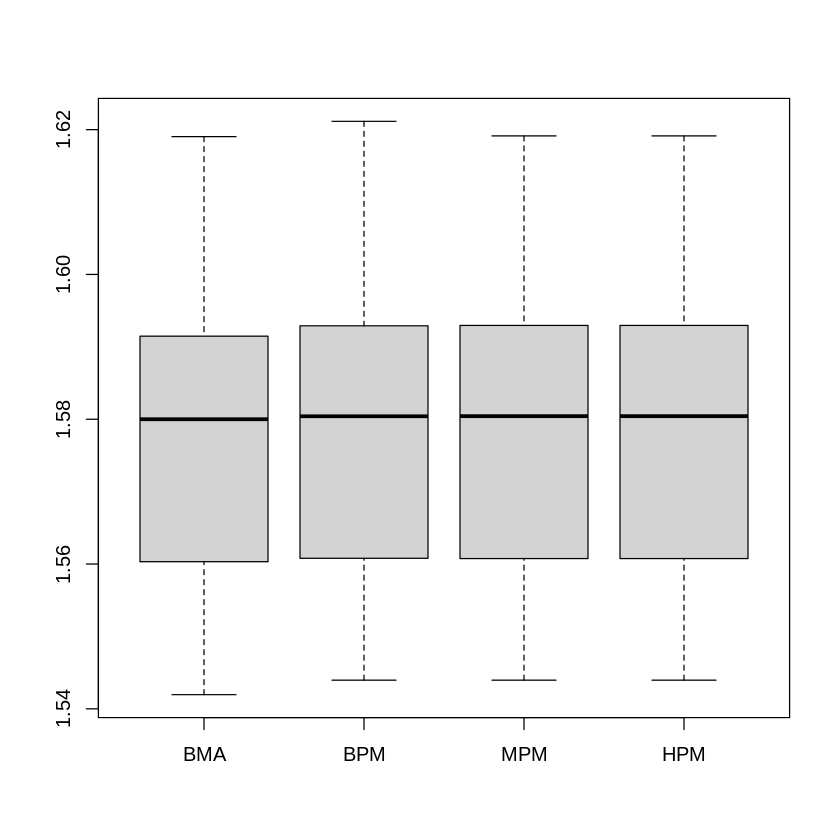

In [ ]:
set.seed(99)
results = matrix(NA, ncol=4, nrow=10)
colnames(results) = c('BMA', 'BPM', 'MPM', 'HPM')
 
for (i in 1:10) {
    n = nrow(wind)
    train = sample(1:n, size = round(0.6*n), replace=FALSE)
    wind.train = wind[train,]
    wind.test = wind[-train,]
    wind.lm_bay = bas.lm(Bear.Creek ~ ., data = wind.train,
                          prior = 'BIC', modelprior = uniform())
 
    for (name in colnames(results)) {
        y_pred = predict(wind.lm_bay, wind.test, estimator=name)$fit
        results[i, name] = cv.summary.bas(y_pred, wind.test$Bear.Creek)
    }
}
 
boxplot(results)

Bayesian Model prior and posteriors parameters

In [ ]:
install.packages('LearnBayes')
install.packages('spBayes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘abind’, ‘coda’, ‘sp’, ‘magic’, ‘Formula’




In [ ]:
library(LearnBayes)
library(spBayes)

Bayesian linear regression model with a conjugate prior.In Bayesian probability theory, if the posterior distributions p(θ | x) are in the same probability distribution family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function p(x | θ)

In [ ]:
n <- nrow(wind)
p <- 6
n.samples <-9000
beta.prior.mean <- rep(0, times=p)
beta.prior.precision <- 1/10^6*diag(p)
prior.shape <- 0.0001
prior.rate <- 0.0001

bmod <- bayesLMConjugate(Bear.Creek ~ Humboldt + LocustRidge + Talbot + 
    Frey.Farm + BuffaloMountain, data = wind, 
    n.samples,beta.prior.mean, beta.prior.precision, prior.shape, prior.rate)
print(bmod$p.beta.tauSq.samples[1:10,])

      (Intercept)  Humboldt LocustRidge     Talbot     Frey.Farm
 [1,]   0.5282030 0.6723946   0.2582266 0.07641215  6.422191e-03
 [2,]   0.5934345 0.6877979   0.2625482 0.06795614 -1.261105e-02
 [3,]   0.5764976 0.6743030   0.2459880 0.07672603  1.420891e-02
 [4,]   0.5544384 0.6774126   0.2562372 0.07624881 -2.339027e-03
 [5,]   0.6012751 0.6779681   0.2508684 0.07104945  1.065798e-02
 [6,]   0.5995689 0.6873462   0.2457872 0.07554501  4.152927e-05
 [7,]   0.6530082 0.6753556   0.2578409 0.07260154  4.321979e-03
 [8,]   0.5097113 0.6844265   0.2537411 0.07820994  1.808066e-03
 [9,]   0.6135164 0.6836235   0.2476310 0.07798136  1.252891e-03
[10,]   0.5408699 0.6758766   0.2609564 0.06656774  1.351838e-02
      BuffaloMountain   tau.sq
 [1,]    0.0091266711 2.540497
 [2,]   -0.0004319795 2.536002
 [3,]   -0.0004650577 2.483472
 [4,]    0.0040262229 2.522187
 [5,]   -0.0026367149 2.576082
 [6,]   -0.0026852810 2.541719
 [7,]   -0.0074104046 2.570117
 [8,]   -0.0008196592 2.522885
 [9,] 

In [ ]:
print(summary(bmod$p.beta.tauSq.samples))


Iterations = 1:9000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 9000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                     Mean       SD  Naive SE Time-series SE
(Intercept)     0.5698375 0.046722 4.925e-04      4.838e-04
Humboldt        0.6812047 0.008601 9.066e-05      9.066e-05
LocustRidge     0.2499316 0.007739 8.157e-05      8.157e-05
Talbot          0.0758879 0.007506 7.912e-05      7.912e-05
Frey.Farm       0.0039335 0.008981 9.467e-05      9.467e-05
BuffaloMountain 0.0003711 0.004585 4.833e-05      4.833e-05
tau.sq          2.5294292 0.038284 4.035e-04      4.039e-04

2. Quantiles for each variable:

                    2.5%       25%       50%      75%    97.5%
(Intercept)      0.47971  0.538175 0.5688990 0.601297 0.660916
Humboldt         0.66422  0.675405 0.6812526 0.686851 0.698212
LocustRidge      0.23502  0.244632 0.2499965 0.255286 0.264877
Talbot           0.06122  0.070865 0.075

The coda package provides functions for summarizing and plotting the output from Markov Chain Monte Carlo (MCMC) simulations (it is assumed that the package is installed on your computer). The function densplot() displays a plot of the density estimate for each parameter in the object bmod$p.samples, calculated by the density() function.

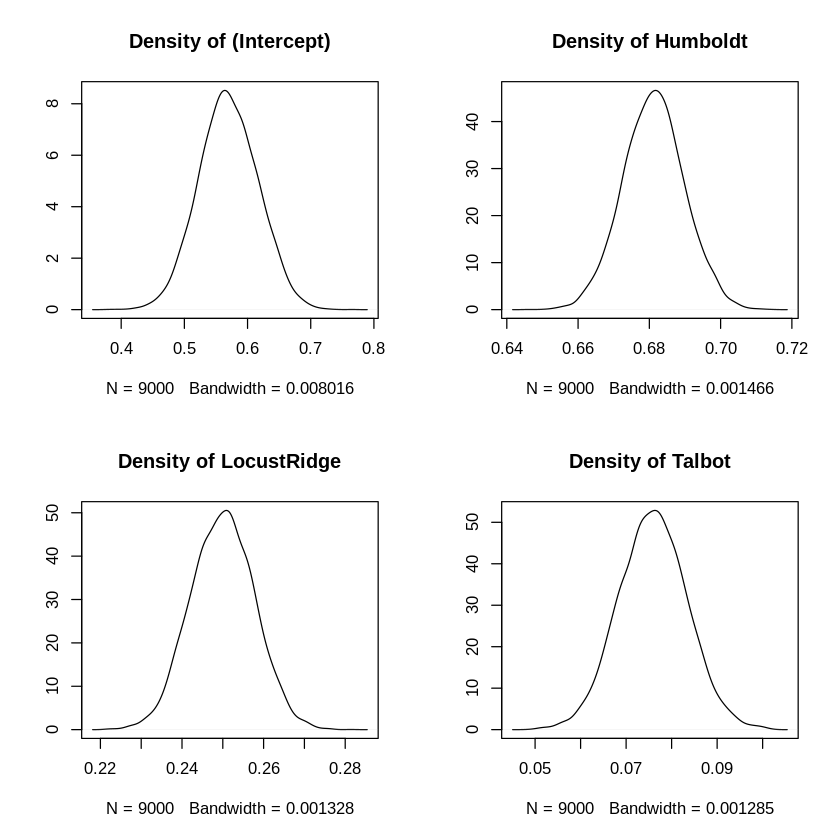

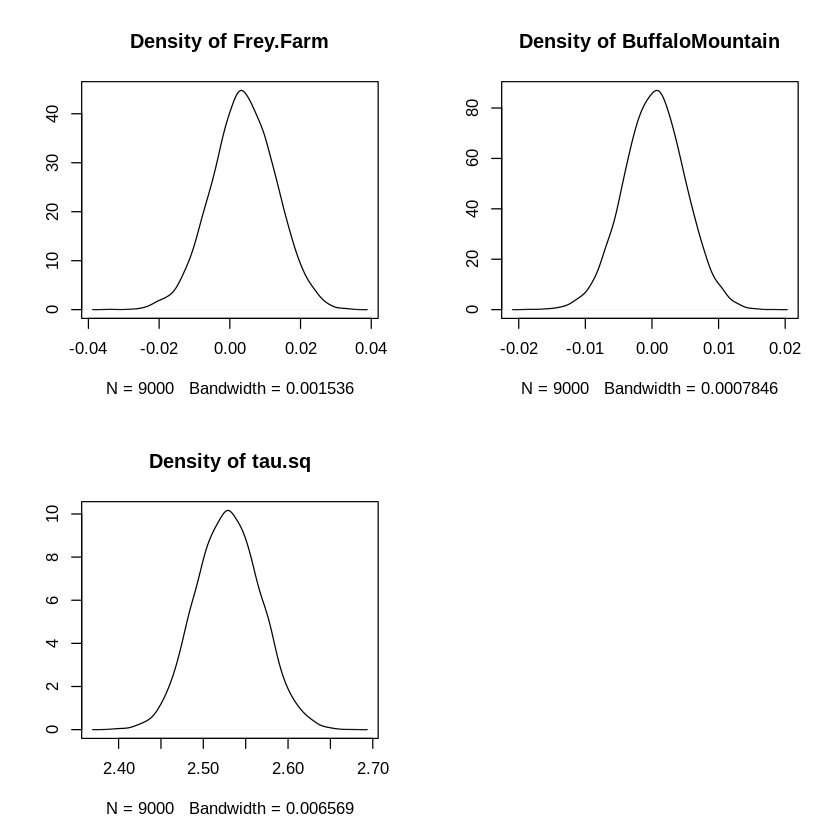

In [ ]:
library(coda)
par(mfrow =c(2,2))
densplot(bmod$p.beta.tauSq.samples, show.obs=FALSE)

In [ ]:
install.packages('bayesplot')
library(bayesplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ggridges’


This is bayesplot version 1.7.2

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting



Warning message:
“The following arguments were unrecognized and ignored: bins”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



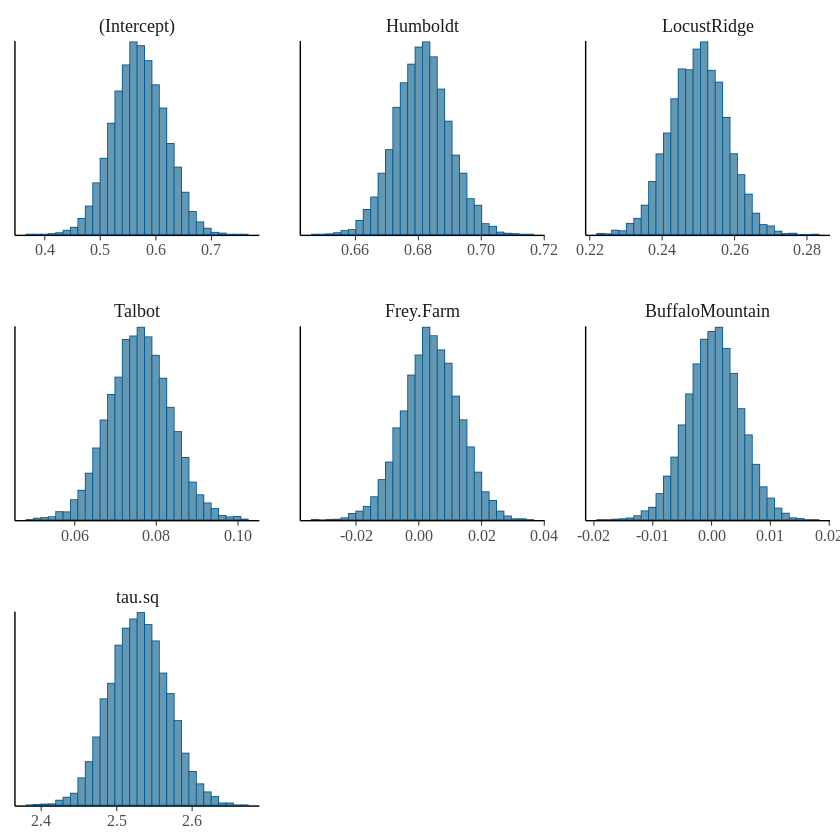

In [ ]:
mcmc_hist(bmod$p.beta.tauSq.samples, bins=50)

Create Highest Posterior Density (HPD) intervals for the parameters in an MCMC sample

In [ ]:
print(HPDinterval(bmod$p.beta.tauSq.samples))

                    lower    upper
(Intercept)      0.478606 0.659358
Humboldt         0.663298 0.696912
LocustRidge      0.234318 0.264251
Talbot           0.061633 0.090664
Frey.Farm       -0.013602 0.021281
BuffaloMountain -0.008538 0.009473
tau.sq           2.457435 2.605276
attr(,"Probability")
[1] 0.95


The function traceplot() displays a plot of iterations vs. sampled values for each parameter in the chain, with a separate plot per parameter.

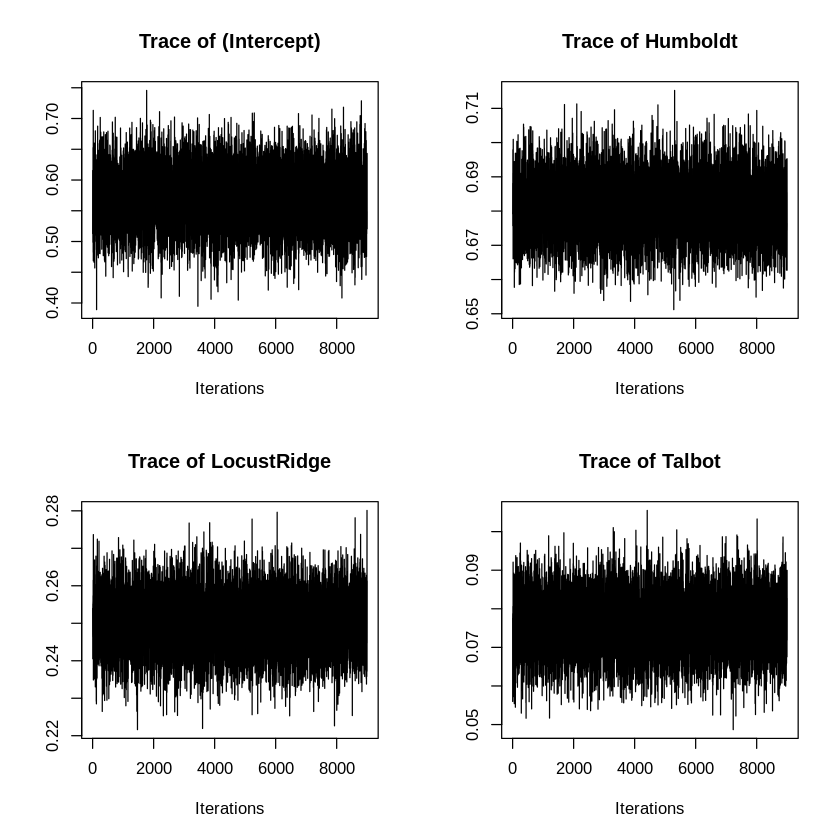

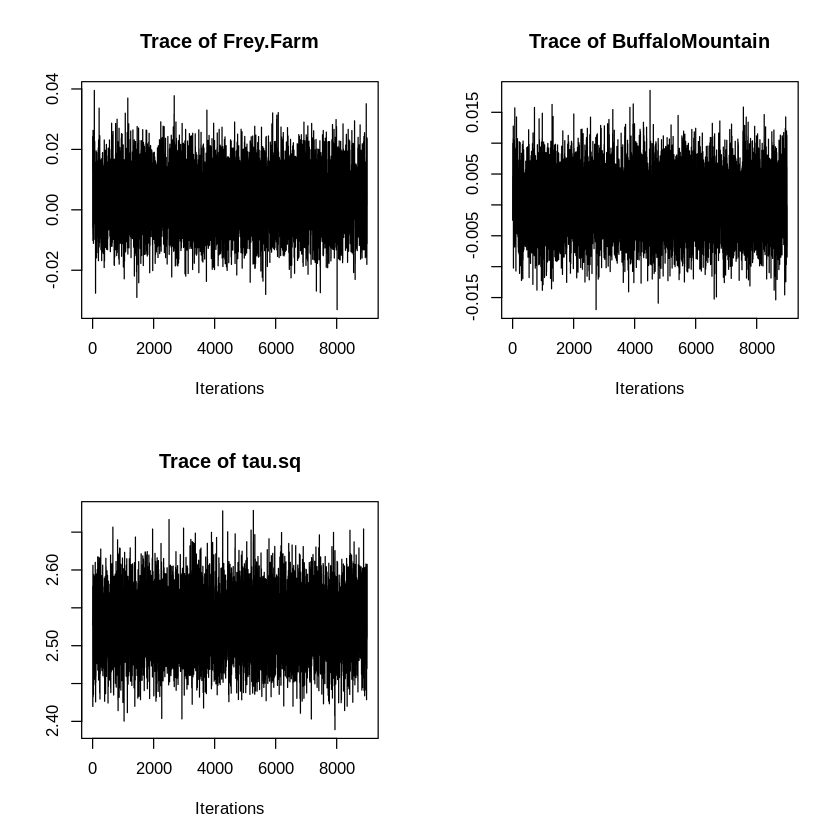

In [ ]:
par(mfrow =c(2,2))
traceplot(bmod$p.beta.tauSq.samples)

Posterior predictive inference
The function blinreg() from the package LearnBayes is used to sample from the joint posterior distribution of β and σ2.

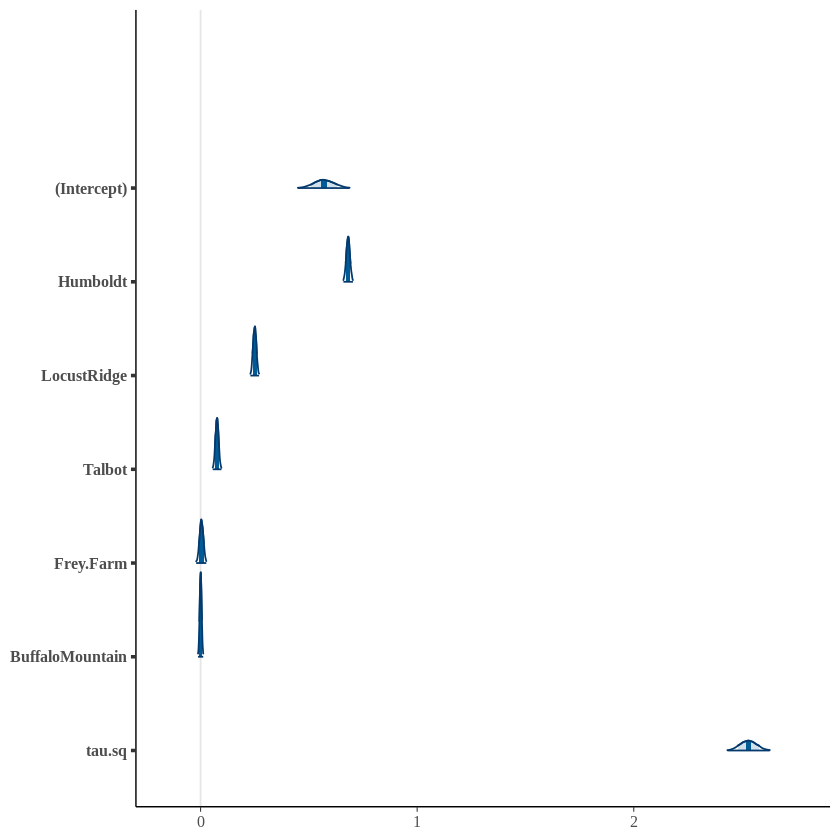

In [ ]:
mcmc_areas(bmod$p.beta.tauSq.samples,
prob = 0.8, # 80% intervals
  prob_outer = 0.99, # 99%
  point_est = "mean")

In [ ]:
install.packages(c("coda","mvtnorm","devtools","dagitty"))
install.packages("usethis")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Warning message in install.packages(c("coda", "mvtnorm", "devtools", "dagitty")):
“installation of package ‘V8’ had non-zero exit status”
Warning message in install.packages(c("coda", "mvtnorm", "devtools", "dagitty")):
“installation of package ‘dagitty’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(devtools)

In [ ]:
data1=dplyr::select(wind,Bear.Creek,Humboldt,LocustRidge,Talbot,BuffaloMountain,Frey.Farm)

In [ ]:
str(data1)

'data.frame':	8760 obs. of  6 variables:
 $ Bear.Creek     : num  8.73 7.37 7.38 6.76 4.55 0.87 2.78 4.14 5.85 7.32 ...
 $ Humboldt       : num  10.14 7.73 6.9 8.33 6.47 ...
 $ LocustRidge    : num  7.73 9.13 5.73 2.96 2.31 1.66 1.41 1.33 1.68 2.28 ...
 $ Talbot         : num  7.07 6.65 5.94 4.64 3.55 3.01 0.74 2.36 5.22 6.33 ...
 $ BuffaloMountain: num  13.2 12.7 13.4 14 15.1 ...
 $ Frey.Farm      : num  4.4 5.16 4.8 5.89 2.42 1.36 1.78 3.71 5.54 7.57 ...


In [ ]:
attach(wind)
names(wind)

[1] "Bear.Creek"          "Frey.Farm"           "Criterion.Wind.Park"
 [4] "NedPower"            "Humboldt"            "LocustRidge"        
 [7] "Roth.Rock"           "Talbot"              "Mountaineer"        
[10] "BuffaloMountain"     "BitWorks"            "MtPeakUtility"      
[13] "Anacacho"            "DryLake"             "Kingman"

In [ ]:
y=Bear.Creek
x1=Humboldt
x2=LocustRidge
x3=Talbot
x4=Frey.Farm
x5=BuffaloMountain
lmod=lm(y~x1+x2+x3+x4+x5,x = TRUE,y = TRUE)
print(summary(lmod))



Call:
lm(formula = y ~ x1 + x2 + x3 + x4 + x5, x = TRUE, y = TRUE)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.793  -0.891  -0.037   0.889  13.470 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.57049    0.04692   12.16   <2e-16 ***
x1           0.68126    0.00859   79.31   <2e-16 ***
x2           0.24997    0.00770   32.46   <2e-16 ***
x3           0.07587    0.00741   10.24   <2e-16 ***
x4           0.00381    0.00894    0.43     0.67    
x5           0.00030    0.00462    0.07     0.95    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.59 on 8754 degrees of freedom
Multiple R-squared:  0.809,	Adjusted R-squared:  0.809 
F-statistic: 7.44e+03 on 5 and 8754 DF,  p-value: <2e-16



In [ ]:
parameter.sample <- blinreg(lmod$y,lmod$x,8760)

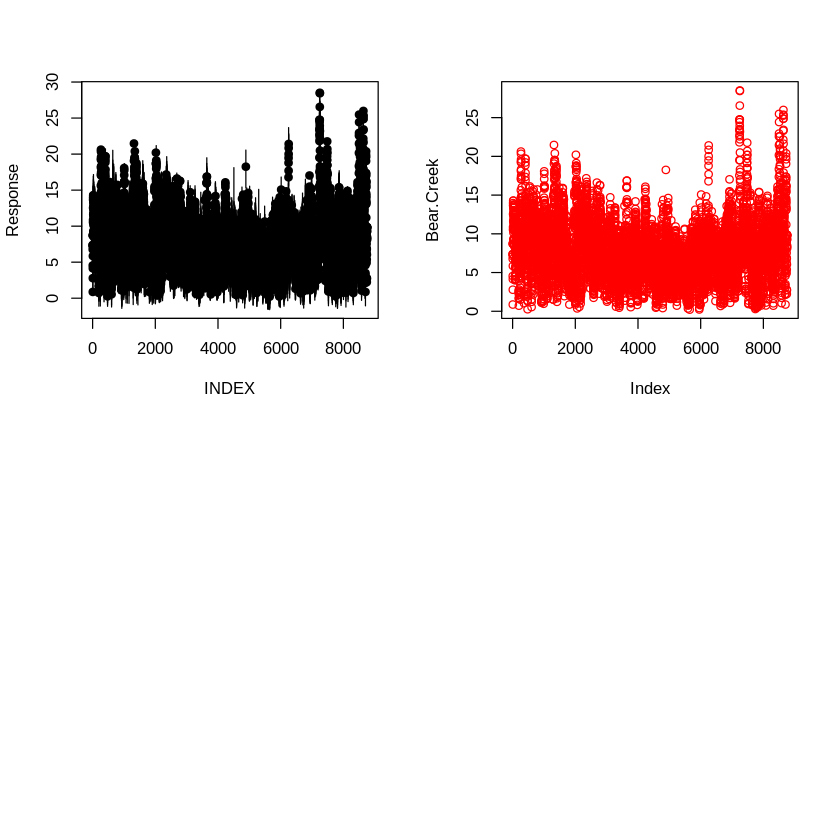

In [ ]:
pred.draws <- blinregpred(lmod$x,parameter.sample)
pred.sum <- apply(pred.draws,2,quantile,c(0.05,0.95))
par(mfrow=c(2,2))
ind <- 1:nrow(wind)
matplot(rbind(ind,ind),pred.sum,type="l",lty=1,col=1,xlab="INDEX",ylab="Response")
points(ind,y,pch=19)
plot(Bear.Creek,col = 'red')

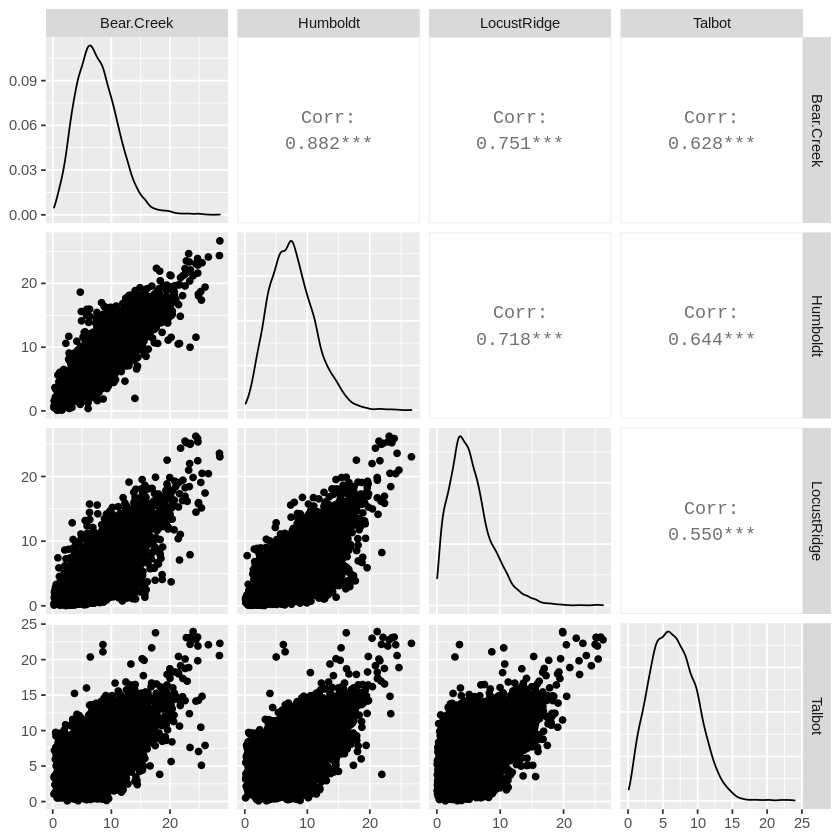

In [ ]:
good2=wind%>%dplyr::select(Bear.Creek,Humboldt,LocustRidge,Talbot)
ggpairs(good2)

# ANACOSTA DATA AND ANALYSIS

In [ ]:
anac=read.csv('data_Anacosta.csv') #https://it.unt.edu/sites/default/files/linearmixedmodels_jds_dec2010.pdf
saul=read.csv('saulData.csv')
attach(anac)
names(anac)
attach(saul)
names(saul)

[1] "Date"          "Temperature"   "Conductance"   "Turbidity"    
[5] "seasonal_name" "seasonal"      "Tempdif"

The following objects are masked from anac:

    Conductance, Date, Temperature, Turbidity




[1] "Date"        "Temperature" "Conductance" "Turbidity"

In [ ]:
#Test for unit root
library(tseries)
library(plm)
Panel.set <-pdata.frame(anac, index = c("seasonal_name", "Date"))

In [ ]:
print(head(anac,10))
print(head(saul,10))
print(nrow(saul))
print(nrow(anac))
print(tail(anac,10))
print(tail(saul,10))

      Date Temperature Conductance Turbidity seasonal_name seasonal Tempdif
1  3/12/19         5.5         494      12.2        Spring        1     0.0
2  3/13/19         6.4         404      13.8        Spring        1     0.9
3  3/14/19         7.6         350      14.0        Spring        1     1.2
4  3/15/19         9.3         320      14.2        Spring        1     1.7
5  3/16/19         9.9         389      11.9        Spring        1     0.6
6  3/17/19        10.1         369       8.9        Spring        1     0.2
7  3/18/19        10.2         367       7.8        Spring        1     0.1
8  3/19/19        10.5         377       7.5        Spring        1     0.3
9  3/20/19        10.8         374       7.0        Spring        1     0.3
10 3/21/19        10.5         407       9.0        Spring        1    -0.3
      Date Temperature Conductance Turbidity
1  3/12/19         5.5         494      12.2
2  3/13/19         6.4         404      13.8
3  3/14/19         7.6       

In [ ]:
summary(anac)
summary(saul)

     Date            Temperature     Conductance      Turbidity     
 Length:438         Min.   : 3.20   Min.   :143.0   Min.   : 2.300  
 Class :character   1st Qu.: 8.00   1st Qu.:288.0   1st Qu.: 5.700  
 Mode  :character   Median :15.95   Median :335.5   Median : 7.300  
                    Mean   :16.70   Mean   :329.9   Mean   : 9.666  
                    3rd Qu.:24.80   3rd Qu.:367.8   3rd Qu.: 9.650  
                    Max.   :31.50   Max.   :494.0   Max.   :98.400  
 seasonal_name         seasonal       Tempdif       
 Length:438         Min.   :1.00   Min.   :-1.8000  
 Class :character   1st Qu.:1.00   1st Qu.:-0.3000  
 Mode  :character   Median :2.00   Median : 0.1000  
                    Mean   :2.21   Mean   : 0.0484  
                    3rd Qu.:3.00   3rd Qu.: 0.4000  
                    Max.   :4.00   Max.   : 2.2000  

     Date           Temperature        Conductance         Turbidity        
 Length:370         Length:370         Length:370         Length:370        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  

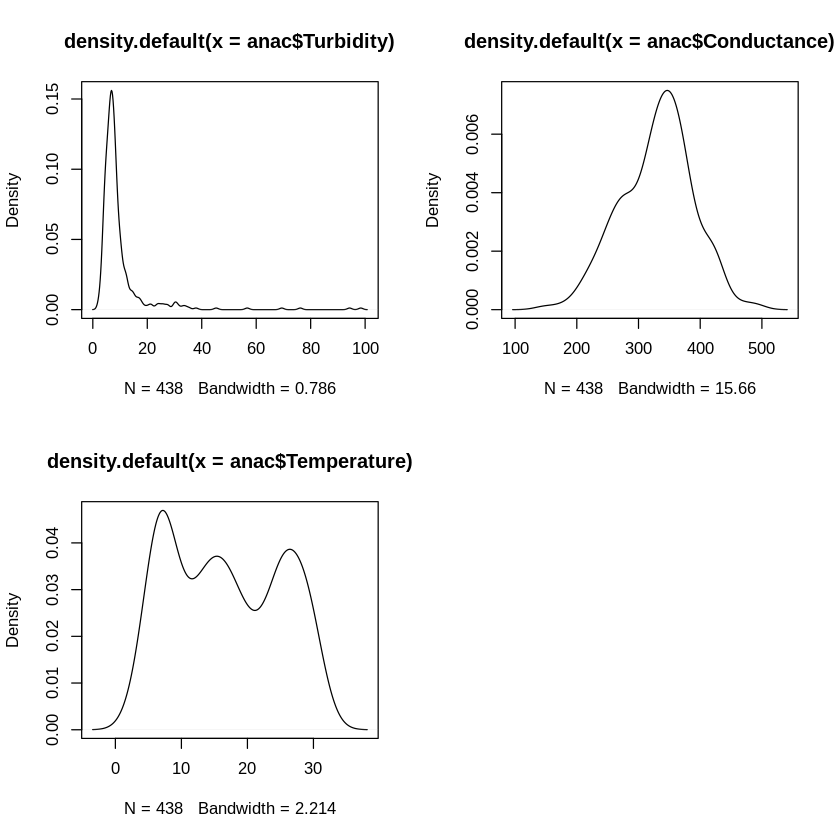

In [ ]:
par(mfrow = c(2,2))
plot(density(anac$Turbidity))
plot(density(anac$Conductance))
plot(density(anac$Temperature))

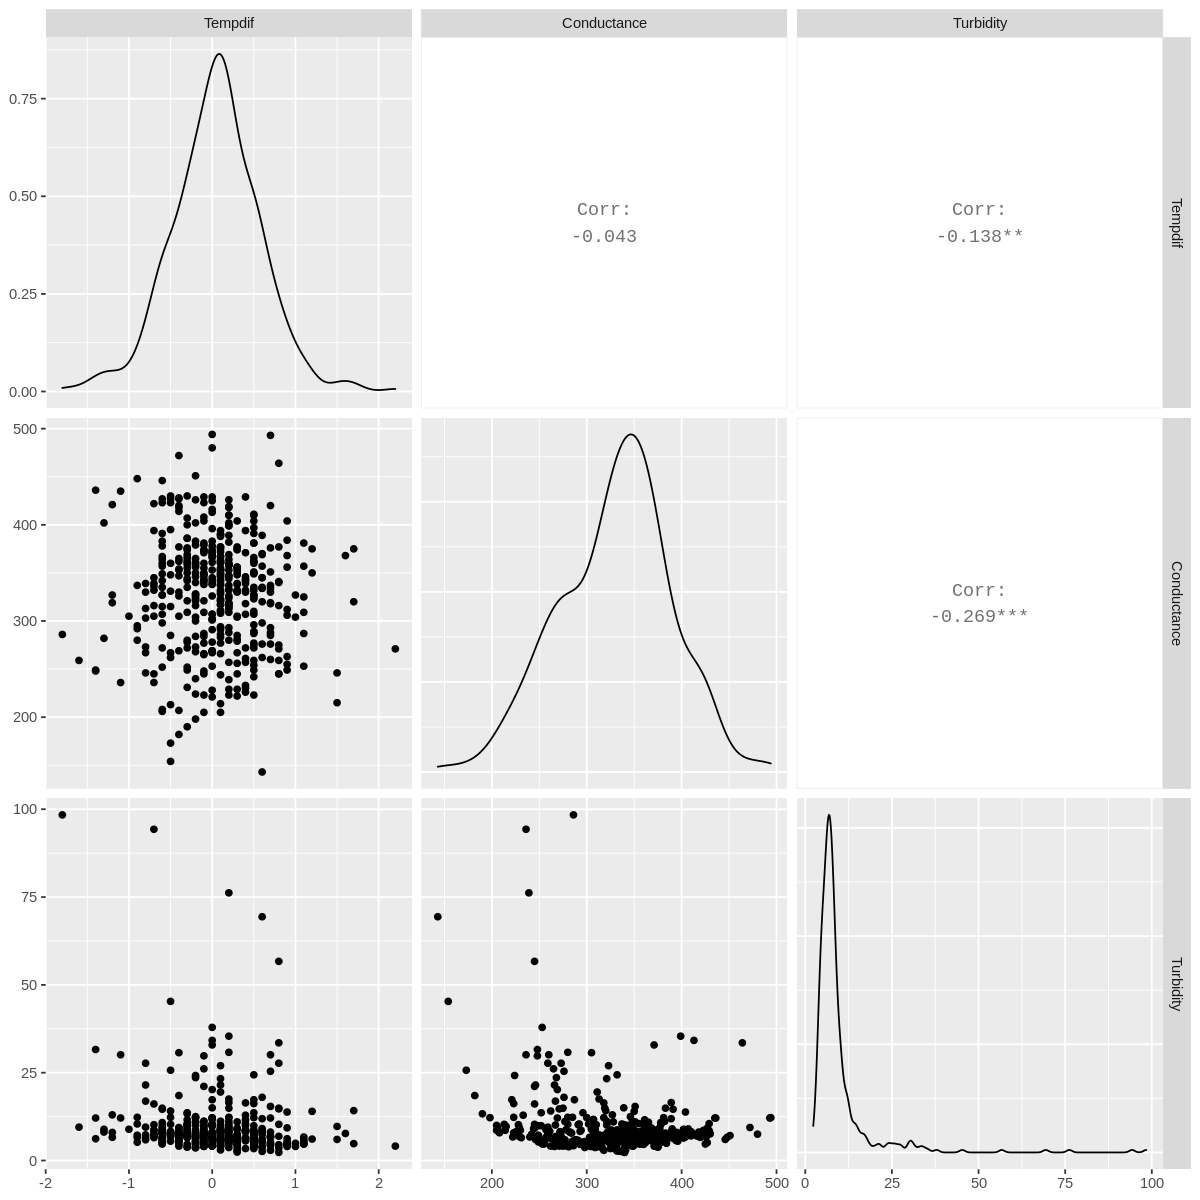

In [ ]:
good3=anac%>%dplyr::select(Tempdif,Conductance,Turbidity)
ggpairs(good3)

In [ ]:
#KNN model
#Generate a random number that is 90% of the total number of rows in dataset
ran <- sample(1:nrow(anac), 0.8 * nrow(anac)) 

In [ ]:
 ##the normalization function is created
 nor <-function(x) { (x -min(x))/(max(x)-min(x))   }

In [ ]:
 ##Run nomalization on first 4 coulumns of dataset because they are the predictors
 anac_norm <- as.data.frame(lapply(anac[,c(2,3,4)], nor))

In [ ]:
summary(anac_norm)

  Temperature      Conductance       Turbidity      
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.1696   1st Qu.:0.4131   1st Qu.:0.03538  
 Median :0.4505   Median :0.5484   Median :0.05203  
 Mean   :0.4771   Mean   :0.5325   Mean   :0.07665  
 3rd Qu.:0.7633   3rd Qu.:0.6403   3rd Qu.:0.07648  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

In [ ]:
##extract training set
anac_train <- anac_norm[ran,] 
##extract testing set
 anac_test <- anac_norm[-ran,] 

In [ ]:
 ##extract 5th column of train dataset because it will be used as 'cl' argument in knn function.
 anac_target_category <- anac[ran,5]
  ##extract 5th column if test dataset to measure the accuracy
 anac_test_category <- anac[-ran,5]

In [ ]:
#let's find the optimal K value
print(round(sqrt(nrow(anac_train)),2))

[1] 18.71


In [ ]:
##load the package class
 library(class)
##run knn function
 pr <- knn(anac_train,anac_test,cl=anac_target_category,k=19)

In [ ]:
 ##create confusion matrix
 tab <- table(pr,anac_test_category)

In [ ]:
print(tab)

        anac_test_category
pr       Fall Spring Summer Winter
  Fall     14      0      0      0
  Spring    5     27      0      1
  Summer    0      2     23      0
  Winter    0      1      0     15


In [ ]:
 ##this function divides the correct predictions by total number of predictions that tell us how accurate teh model is.
 accuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
 print(round(accuracy(tab),2))

[1] 89.77


In [ ]:
i=1
k.optm=1
for (i in 1:20){
  knn.mod <- knn(train=anac_train, test=anac_test, cl=anac_target_category, k=i)
  k.optm[i] <- 100 * sum(anac_test_category == knn.mod)/NROW(anac_test_category)
  k=i
  cat(k,'=',k.optm[i],'
')
}

1 = 96.59091 
2 = 92.04545 
3 = 94.31818 
4 = 94.31818 
5 = 93.18182 
6 = 92.04545 
7 = 94.31818 
8 = 93.18182 
9 = 92.04545 
10 = 92.04545 
11 = 92.04545 
12 = 90.90909 
13 = 88.63636 
14 = 87.5 
15 = 90.90909 
16 = 88.63636 
17 = 90.90909 
18 = 88.63636 
19 = 89.77273 
20 = 87.5 


[1] "Summer"
[1] "Spring"


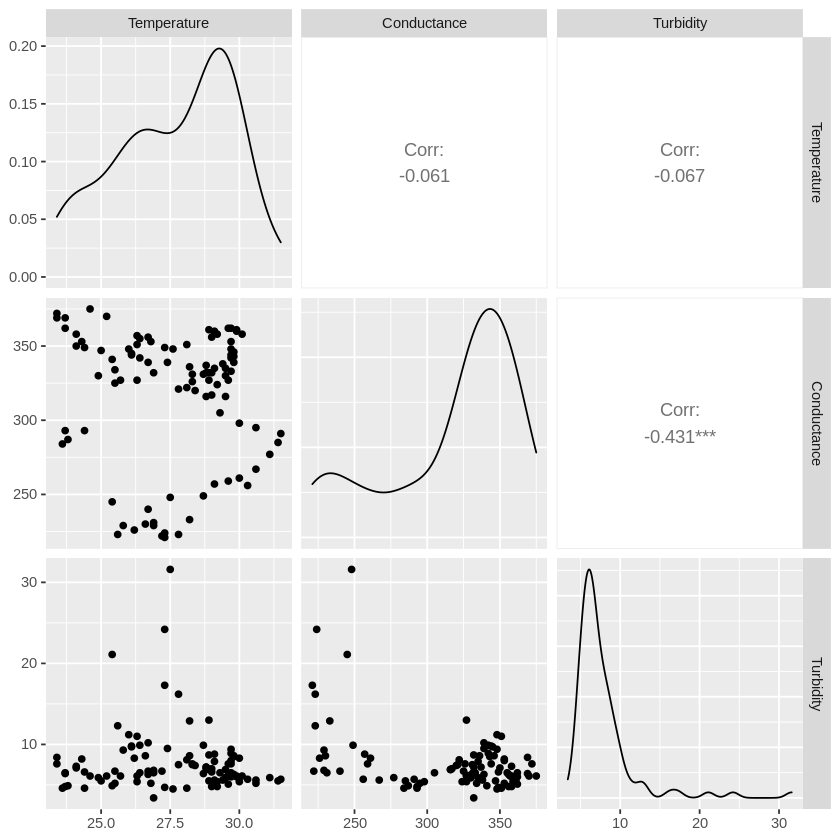

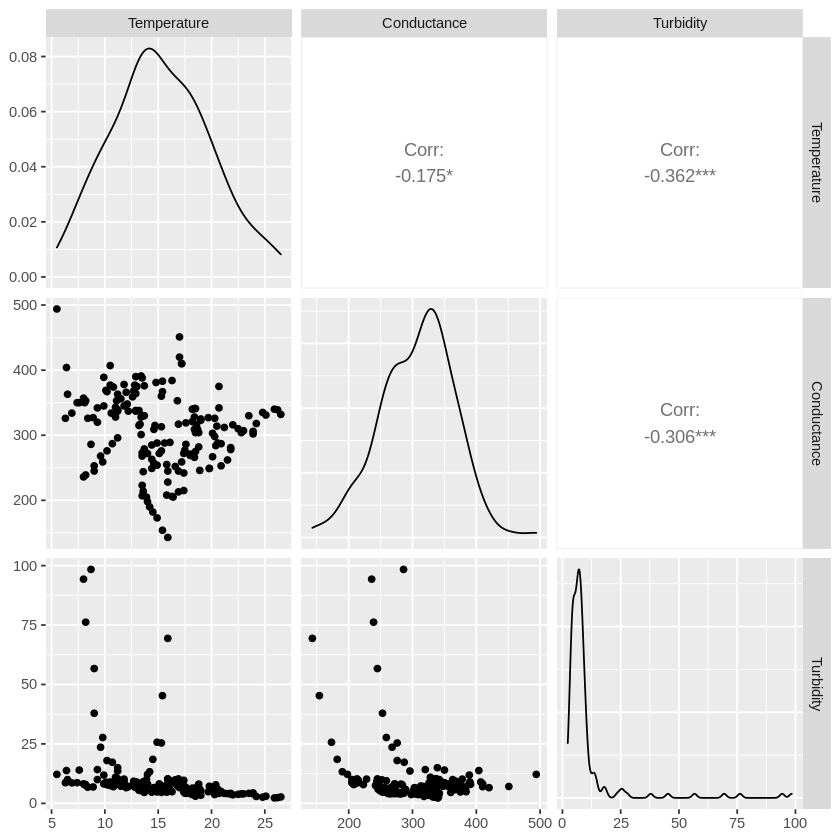

In [ ]:
par(mfrow = c(2,1))
print('Summer')
summer=anac%>%dplyr::filter(seasonal_name=='Summer')%>%dplyr::select(Temperature,Conductance,Turbidity)
ggpairs(summer)
print('Spring')
spring=anac%>%dplyr::filter(seasonal_name=='Spring')%>%dplyr::select(Temperature,Conductance,Turbidity)
ggpairs(spring)


[1] "Fall"
[1] "Winter"


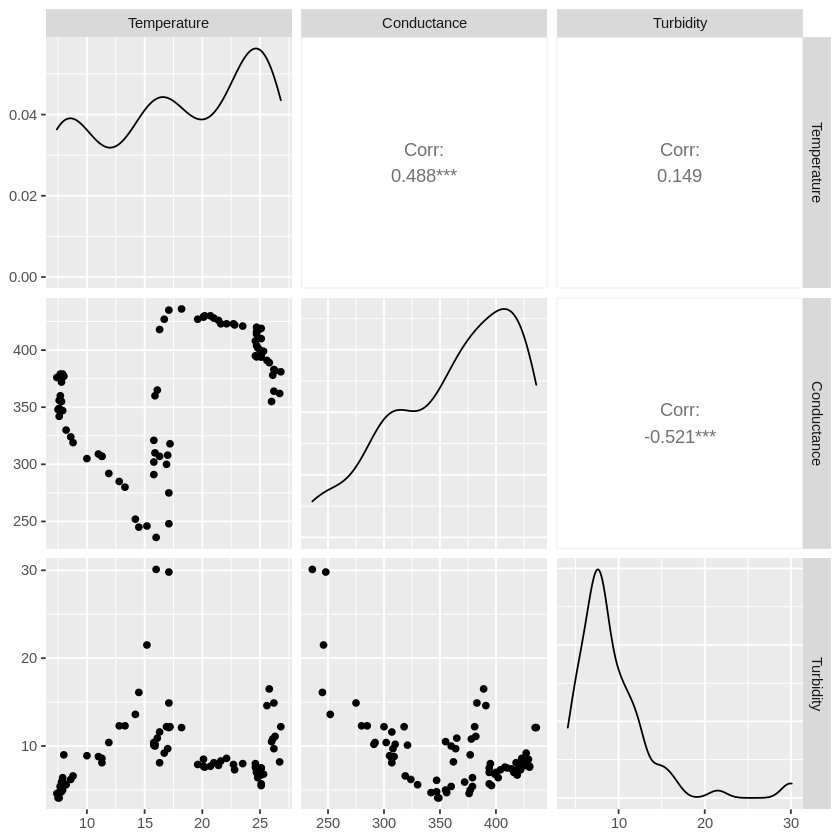

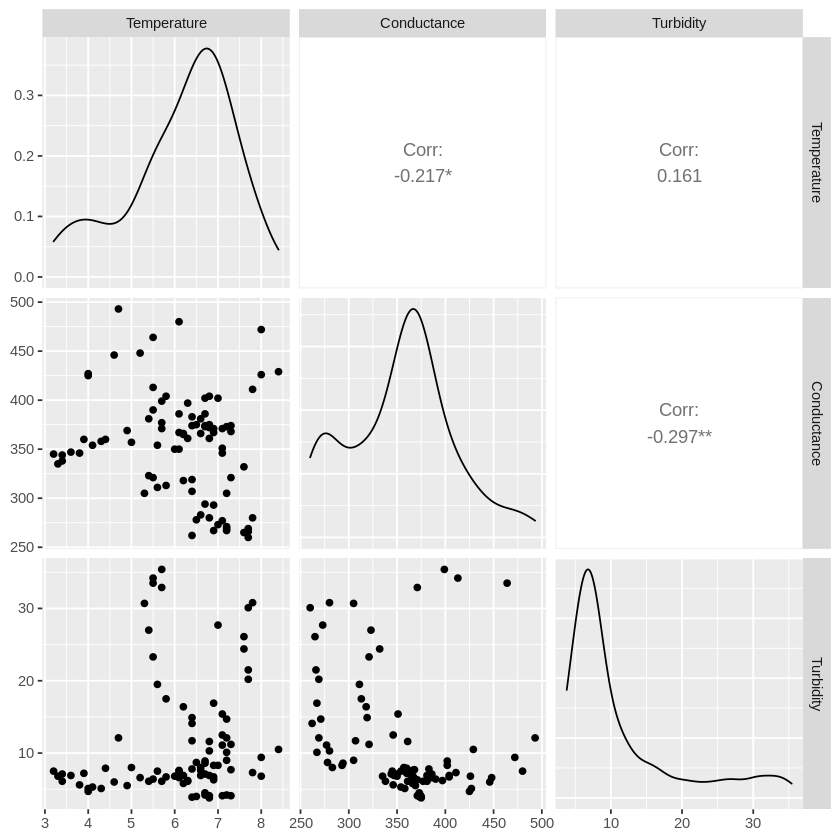

In [ ]:
print('Fall')
Fall=anac%>%dplyr::filter(seasonal_name=='Fall')%>%dplyr::select(Temperature,Conductance,Turbidity)
ggpairs(Fall)

print('Winter')
winter=anac%>%dplyr::filter(seasonal_name=='Winter')%>%dplyr::select(Temperature,Conductance,Turbidity)
ggpairs(winter)

In [ ]:
#Test for unit root
Panel.set <- pdata.frame(anac, index = c("seasonal_name", "Date"))

The Dickey-Fuller test to check for stochastic trends. The null hypothesis is that the
series has a unit root (i.e. non-stationary). If unit root is present you can take the first
difference of the variable. 

In [ ]:
adf.test(Panel.set$Conductance, k=2)

Warning message in adf.test(Panel.set$Conductance, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Panel.set$Conductance
Dickey-Fuller = -4.8213, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
adf.test(Panel.set$Turbidity, k=2)

Warning message in adf.test(Panel.set$Turbidity, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Panel.set$Turbidity
Dickey-Fuller = -5.8046, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
adf.test(Panel.set$Tempdif, k=2)

Warning message in adf.test(Panel.set$Tempdif, k = 2):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  Panel.set$Tempdif
Dickey-Fuller = -7.955, Lag order = 2, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
#construct data
data_spring=dplyr::filter(anac,seasonal_name=='Spring')
spring_reg = lm(Conductance ~ Turbidity + Tempdif, data = data_spring)
summary(spring_reg)


Call:
lm(formula = Conductance ~ Turbidity + Tempdif, data = data_spring)

Residuals:
    Min      1Q  Median      3Q     Max 
-108.65  -35.45    4.77   37.19  191.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 317.3471     5.8486  54.261  < 2e-16 ***
Turbidity    -1.2094     0.3229  -3.745 0.000249 ***
Tempdif      10.8088     7.4699   1.447 0.149812    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.32 on 164 degrees of freedom
Multiple R-squared:  0.1053,	Adjusted R-squared:  0.09439 
F-statistic: 9.651 on 2 and 164 DF,  p-value: 0.000109


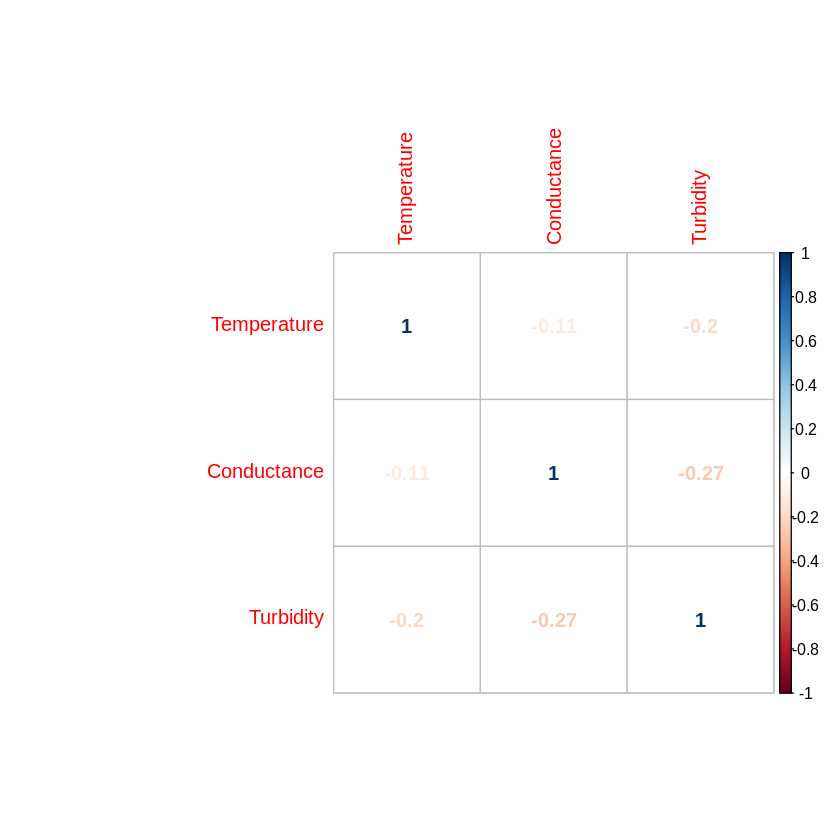

In [ ]:
#Correlation matrix
xx=cor(dplyr::select(anac,c(2:4)))
corrplot::corrplot(xx,method ="number")


In [ ]:
#Turbidity as a dependent variable
data_spring=dplyr::filter(anac,seasonal_name=='Spring')
spring_reg1 = lm(Turbidity ~ Conductance + Tempdif, data = data_spring)
summary(spring_reg1)


Call:
lm(formula = Turbidity ~ Conductance + Tempdif, data = data_spring)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.948  -6.139  -3.049   2.162  79.129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.00481    5.39092   5.751 4.23e-08 ***
Conductance -0.06515    0.01740  -3.745 0.000249 ***
Tempdif     -3.83264    1.71895  -2.230 0.027129 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.84 on 164 degrees of freedom
Multiple R-squared:  0.1205,	Adjusted R-squared:  0.1098 
F-statistic: 11.24 on 2 and 164 DF,  p-value: 2.665e-05


In [ ]:
data_summer=dplyr::filter(anac,seasonal_name=='Summer')
summer_reg = lm(Conductance ~ Turbidity + Tempdif, data = data_summer)
summary(summer_reg)


Call:
lm(formula = Conductance ~ Turbidity + Tempdif, data = data_summer)

Residuals:
   Min     1Q Median     3Q    Max 
-99.08 -32.00  10.50  30.78  68.66 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  360.486      9.152  39.387  < 2e-16 ***
Turbidity     -5.475      1.054  -5.193 1.12e-06 ***
Tempdif      -17.288      8.734  -1.979   0.0506 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.02 on 98 degrees of freedom
Multiple R-squared:  0.2172,	Adjusted R-squared:  0.2012 
F-statistic:  13.6 on 2 and 98 DF,  p-value: 6.151e-06


In [ ]:
data_summer=dplyr::filter(anac,seasonal_name=='Summer')
summer_reg1 = lm(Turbidity ~ Conductance + Tempdif, data = data_summer)
summary(summer_reg1)


Call:
lm(formula = Turbidity ~ Conductance + Tempdif, data = data_summer)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8445 -1.6730 -0.2665  1.2730 17.4051 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.33585    2.43489   8.352 4.48e-13 ***
Conductance -0.03942    0.00759  -5.193 1.12e-06 ***
Tempdif     -2.59580    0.70879  -3.662 0.000405 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.396 on 98 degrees of freedom
Multiple R-squared:  0.2839,	Adjusted R-squared:  0.2693 
F-statistic: 19.43 on 2 and 98 DF,  p-value: 7.824e-08


In [ ]:
data_fall=dplyr::filter(anac,seasonal_name=='Fall')
fall_reg = lm(Turbidity ~ Conductance + Tempdif, data = data_fall)
summary(fall_reg)


Call:
lm(formula = Turbidity ~ Conductance + Tempdif, data = data_fall)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7014 -2.0539 -0.0014  1.2386 15.7530 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.559603   2.918155   8.416 1.47e-12 ***
Conductance -0.043241   0.007883  -5.485 4.93e-07 ***
Tempdif     -2.113194   0.992997  -2.128   0.0365 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.847 on 78 degrees of freedom
Multiple R-squared:  0.3114,	Adjusted R-squared:  0.2938 
F-statistic: 17.64 on 2 and 78 DF,  p-value: 4.781e-07


In [ ]:
data_winter=dplyr::filter(anac,seasonal_name=='Winter')
winter_reg = lm(Turbidity ~ Conductance + Tempdif , data = data_winter)
summary(winter_reg)


Call:
lm(formula = Turbidity ~ Conductance + Tempdif, data = data_winter)

Residuals:
   Min     1Q Median     3Q    Max 
-7.515 -5.354 -2.727  1.907 25.488 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.59191    5.56081   4.962 3.49e-06 ***
Conductance -0.04570    0.01551  -2.947  0.00413 ** 
Tempdif      2.77602    1.93490   1.435  0.15500    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.91 on 86 degrees of freedom
Multiple R-squared:  0.1097,	Adjusted R-squared:  0.08898 
F-statistic: 5.297 on 2 and 86 DF,  p-value: 0.006767


In [ ]:
install.packages("sjPlot")
library(sjPlot)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’, ‘xtable’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘emmeans’, ‘lme4’, ‘bayestestR’, ‘effectsize’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’


Warning message in install.packages("sjPlot"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘sjstats’ had non-zero exit status”
Warning message in install.packages("sjPlot"):
“installation of package ‘sjPlot’ had non-zero exit status”


ERROR: ignored

In [ ]:
tab_model(winter_reg,fall_reg,summer_reg,spring_reg)

ERROR: ignored

In [ ]:
print(anac %>% dplyr::arrange(seasonal_name)%>%count(seasonal_name))

  seasonal_name   n
1          Fall  81
2        Spring 167
3        Summer 101
4        Winter  89


In [ ]:
library(foreign)

In [ ]:
names(anac)

[1] "Date"          "Temperature"   "Conductance"   "Turbidity"    
[5] "seasonal_name" "seasonal"      "Tempdif"

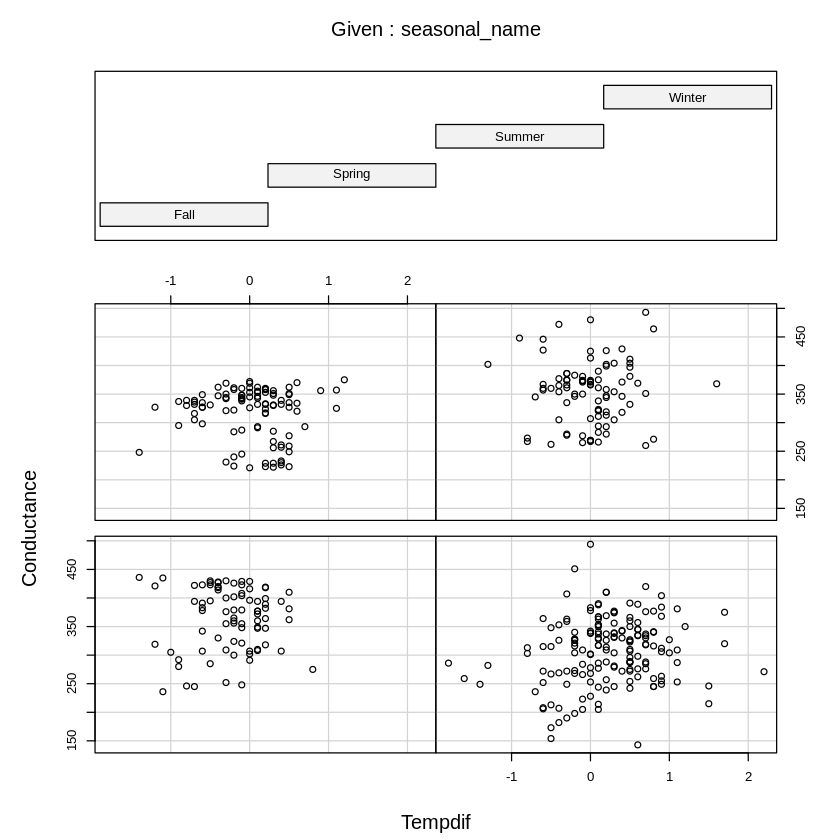

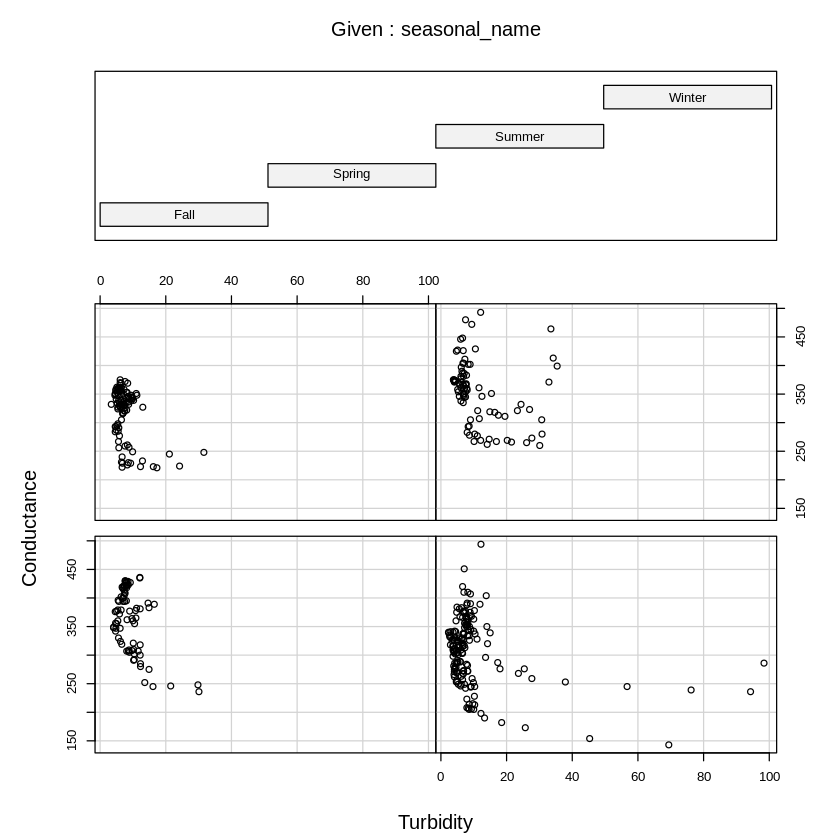

In [ ]:
#Let's see the data in a panel https://www.princeton.edu/~otorres/Panel101R.pdf
par(mfrow = c(2,2))
coplot(Conductance ~ Tempdif|seasonal_name, data=anac)
coplot(Conductance ~ Turbidity|seasonal_name, data=anac)

In [ ]:
install.packages('gplots')
library(gplots)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




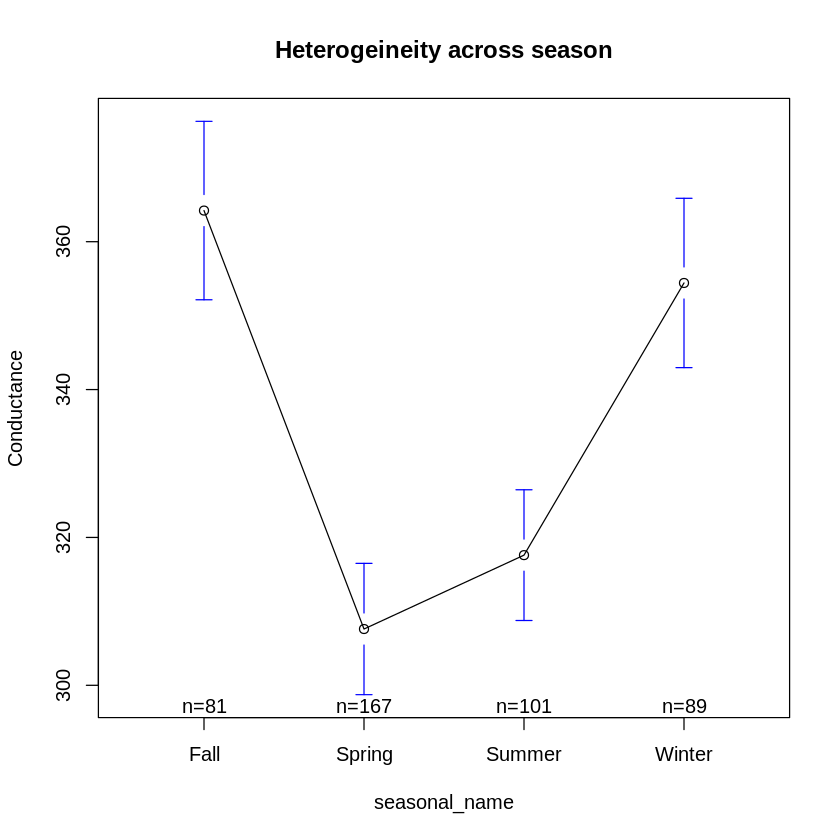

In [ ]:
plotmeans(formula=Conductance ~ seasonal_name, main="Heterogeineity across season", data=anac)

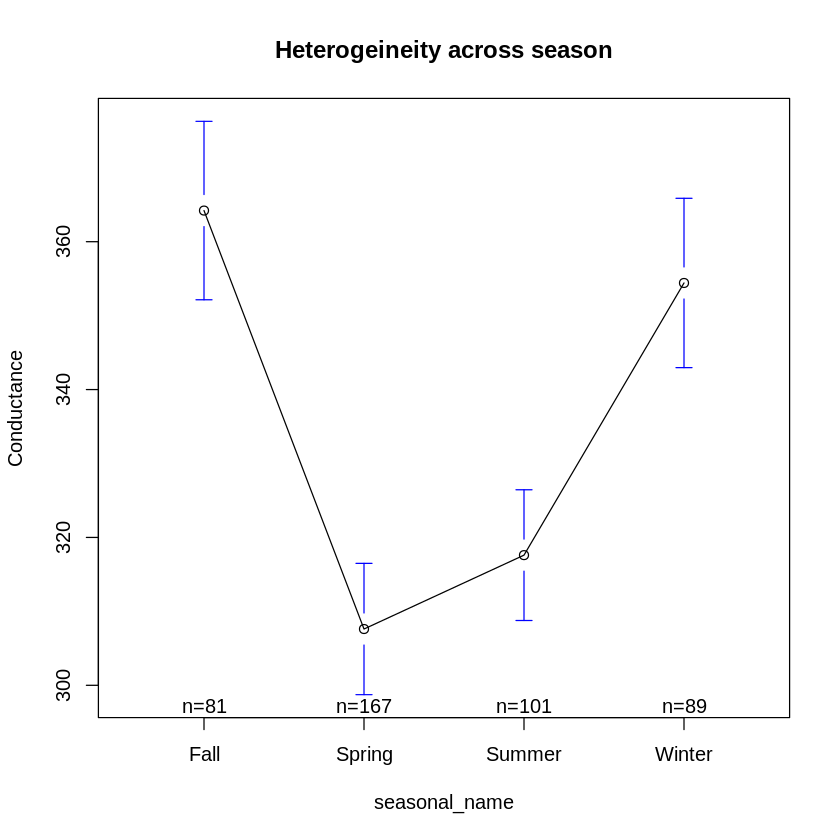

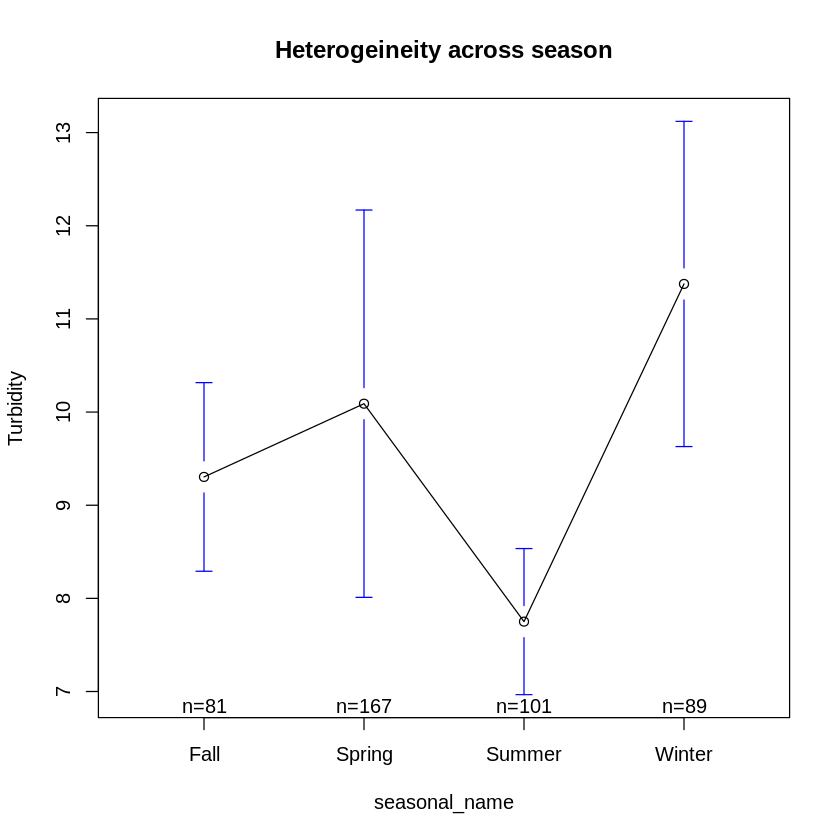

In [ ]:
par(mfrow =c(1,1))
plotmeans(formula=Conductance ~ seasonal_name, main="Heterogeineity across season", data=anac)
plotmeans(formula=Turbidity ~ seasonal_name, main="Heterogeineity across season", data=anac)

In [ ]:
winter=subset(anac, anac$seasonal_name=="Summer")
cor(winter$Turbidity,winter$Conductance)

[1] -0.4311672

In [ ]:
print(head(anac,5))

     Date Temperature Conductance Turbidity seasonal_name seasonal Tempdif
1 3/12/19         5.5         494      12.2        Spring        1     0.0
2 3/13/19         6.4         404      13.8        Spring        1     0.9
3 3/14/19         7.6         350      14.0        Spring        1     1.2
4 3/15/19         9.3         320      14.2        Spring        1     1.7
5 3/16/19         9.9         389      11.9        Spring        1     0.6


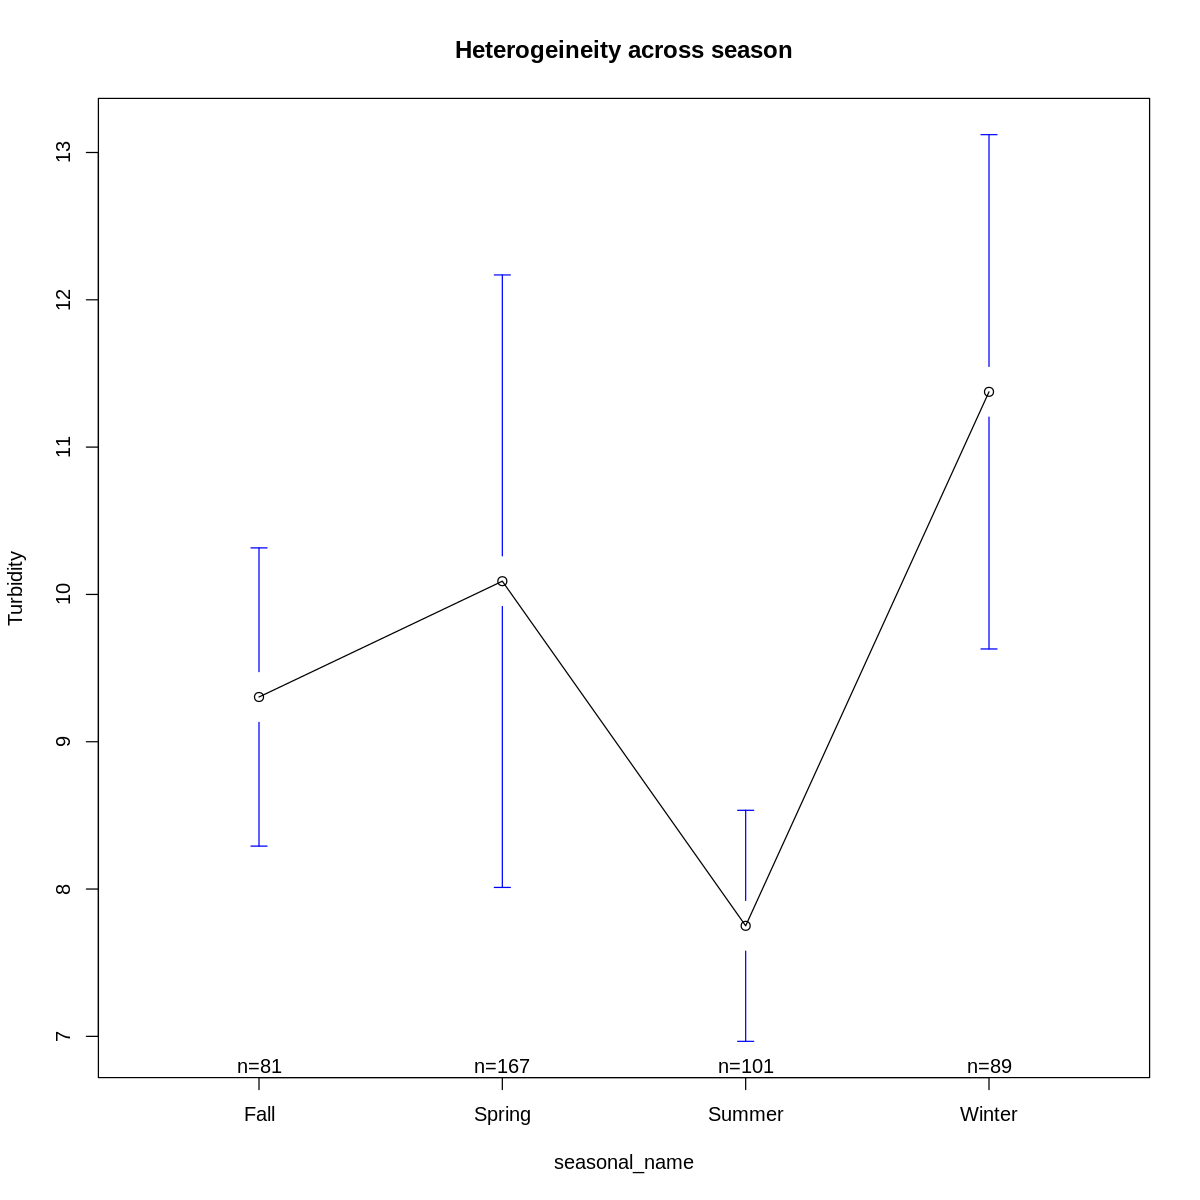

In [ ]:
plotmeans(formula=Turbidity ~ seasonal_name, main="Heterogeineity across season", data=anac)

In [ ]:
#OLS regression
OLS_reg=lm(Turbidity ~ Conductance,data=anac)
summary(OLS_reg) 


Call:
lm(formula = Turbidity ~ Conductance, data = anac)

Residuals:
   Min     1Q Median     3Q    Max 
-8.566 -4.119 -1.792  1.212 86.795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.241088   2.540282   9.543  < 2e-16 ***
Conductance -0.044181   0.007581  -5.827  1.1e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.307 on 436 degrees of freedom
Multiple R-squared:  0.07226,	Adjusted R-squared:  0.07013 
F-statistic: 33.96 on 1 and 436 DF,  p-value: 1.095e-08


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“NAs introduced by coercion”
Warning message in storage.mode(v) <- "double":
“NAs introduced by coercion”


ERROR: ignored

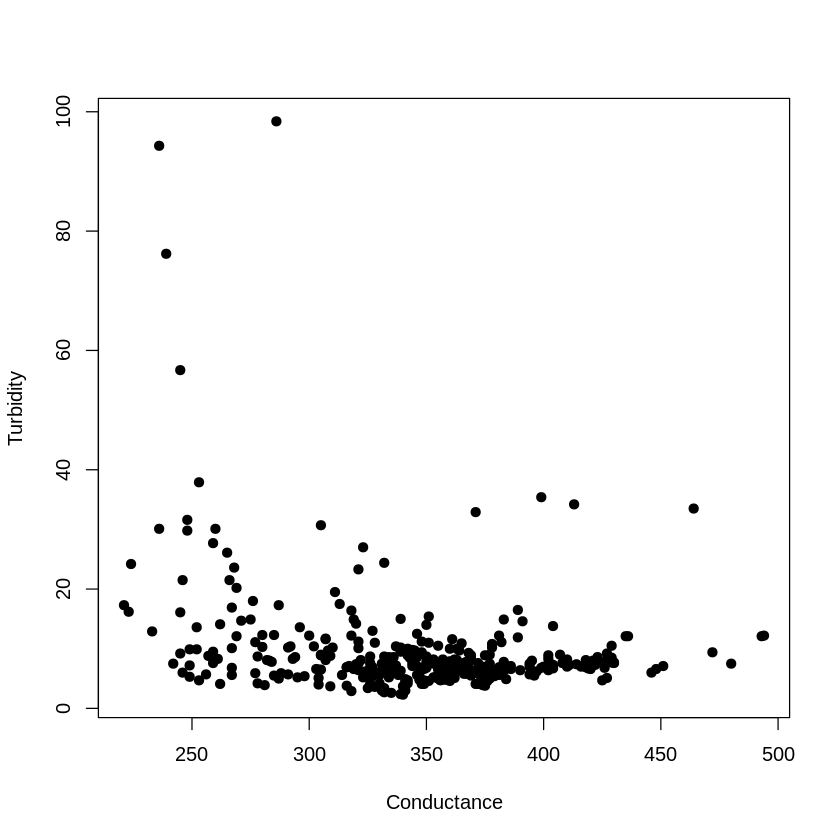

In [ ]:
#residuals
yhat=OLS_reg$fitted
plot(Conductance, Turbidity, pch=19, xlab="Conductance", ylab="Turbidity")
abline(lm(Turbidity~Conductance),lwd=3,col='red')

In [ ]:
plot(Tempdif, Turbidity, pch=19, xlab="Temperature", ylab="Turbidity")
abline(lm(Turbidity~Tempdif),lwd=3,col='red')

ERROR: ignored

In [ ]:
#Fixed effects using Least squares dummy variable model
#SAUL: This is a good model.
fixed.dum <-lm(Conductance ~ Tempdif+Turbidity + factor(seasonal_name) - 1, data=anac)
summary(fixed.dum)


Call:
lm(formula = Turbidity ~ Tempdif + Conductance + factor(seasonal_name) - 
    1, data = anac)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.055  -4.679  -1.358   1.556  82.147 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
Tempdif                     -2.465788   0.858226  -2.873  0.00426 ** 
Conductance                 -0.053761   0.008098  -6.639 9.51e-11 ***
factor(seasonal_name)Fall   28.308534   3.138050   9.021  < 2e-16 ***
factor(seasonal_name)Spring 27.189748   2.579909  10.539  < 2e-16 ***
factor(seasonal_name)Summer 24.888584   2.723718   9.138  < 2e-16 ***
factor(seasonal_name)Winter 30.412298   3.026853  10.047  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.06 on 432 degrees of freedom
Multiple R-squared:  0.5656,	Adjusted R-squared:  0.5596 
F-statistic: 93.76 on 6 and 432 DF,  p-value: < 2.2e-16


In [ ]:
yhat_dum <- fixed.dum$fitted

In [ ]:
install.packages('car')
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




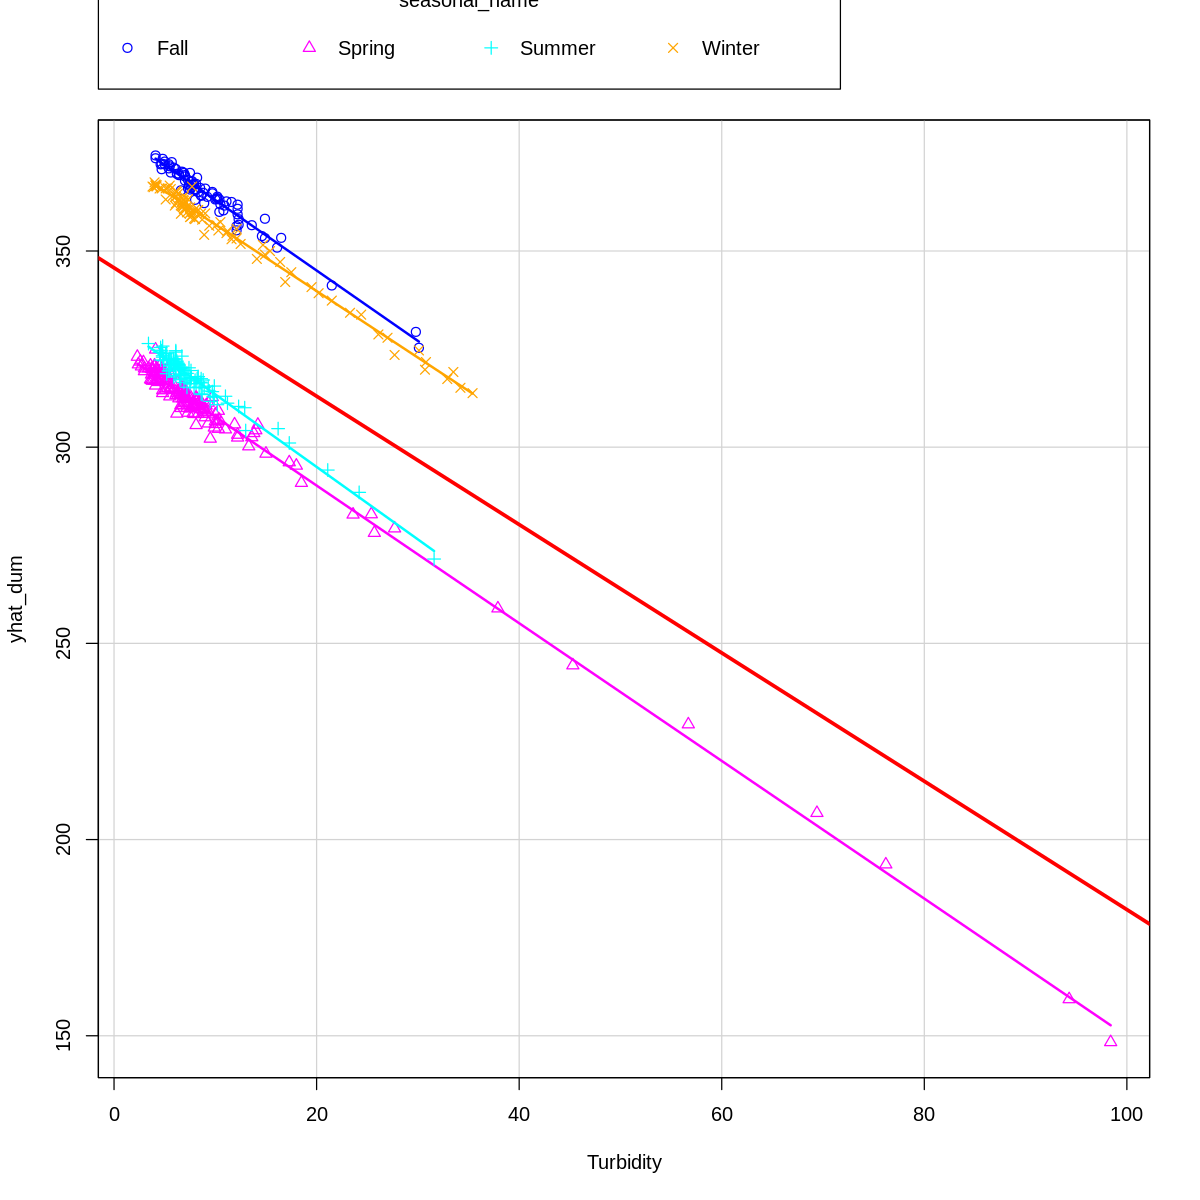

In [ ]:
scatterplot(yhat_dum~Turbidity|seasonal_name, 
boxplots=FALSE, xlab="Turbidity", ylab="yhat_dum",smooth=FALSE)
abline(lm(Conductance~Turbidity),lwd=3,col='red')#OLS regression red line

In [ ]:
install.packages('apsrtable')
library(apsrtable)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
apsrtable(OLS_reg,fixed.dum, model.names = c("OLS", "OLS_DUM")) 

\begin{table}[!ht]
\caption{}
\label{} 
\begin{tabular}{ l D{.}{.}{2}D{.}{.}{2} } 
\hline 
  & \multicolumn{ 1 }{ c }{ OLS } & \multicolumn{ 1 }{ c }{ OLS_DUM } \\ \hline
 %                             & OLS       & OLS_DUM  \\ 
(Intercept)                   & 346.80 ^* &          \\ 
                              & (3.87)    &          \\ 
Tempdif                       & -8.96     & 3.53     \\ 
                              & (5.12)    & (4.90)   \\ 
Turbidity                     & -1.70 ^*  & -1.72 ^* \\ 
                              & (0.28)    & (0.26)   \\ 
factor(seasonal\_name)Fall   &           & 381.06 ^*\\ 
                              &           & (6.22)   \\ 
factor(seasonal\_name)Spring &           & 324.18 ^*\\ 
                              &           & (4.97)   \\ 
factor(seasonal\_name)Summer &           & 330.86 ^*\\ 
                              &           & (5.49)   \\ 
factor(seasonal\_name)Winter &           & 374.03 ^*\\ 
                              &   

Comparing OLS vs LSDV model
Each component of the factor variable (seasonal_name) is absorbing the effects particular to each season. Turbidity was significant in the OLS model.In the  controlling for differences across season,Turbidity was  significant in the OLS_DUM (i.e. LSDV model).



**OLS**,
The coefficients of Turbidity and Temperature indicate how
much Conductance changes when each of them  increase respectivily  by
one unit. Notice the predictors  are both significant in the OLS model

**OLS_Dum**,
The coefficient of Turbidity indicates how
much Conductance changes overtime, controlling by differences in season, when Turbidity
increases by one unit. Notice Turbidity is significant in the LSDV model

In [ ]:
#Fixed Effects: n entity-specific intercepts(using plm)
install.packages('plm')
library(plm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
fixed <- plm(Conductance ~ Tempdif+Turbidity,
 data=anac, index=c("seasonal_name", "Date"), model="within")
summary(fixed)

Oneway (individual) effect Within Model

Call:
plm(formula = Conductance ~ Tempdif + Turbidity, data = anac, 
    model = "within", index = c("seasonal_name", "Date"))

Unbalanced Panel: n = 4, T = 81-167, N = 438

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-110.2181  -38.0552    5.6889   34.6179  190.8285 

Coefficients:
          Estimate Std. Error t-value  Pr(>|t|)    
Tempdif    3.53038    4.90055  0.7204    0.4717    
Turbidity -1.72207    0.25939 -6.6389 9.506e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1259900
Residual Sum of Squares: 1135800
R-Squared:      0.098513
Adj. R-Squared: 0.088079
F-statistic: 23.6042 on 2 and 432 DF, p-value: 1.8673e-10

In [ ]:
install.packages('lmtest')
library(lmtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  Conductance ~ Tempdif + Turbidity
chisq = 298.14, df = 81, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


Pr(>|t|)= Two-tail p-values test the hypothesis that each coefficient is different from 0. To reject this, the p-value has to be lower than
0.05 (95%, you could choose also an alpha of 0.10), if this is the case then you can say that the variable has a significant influence on
your dependent variable (Conductance)

In the F-Statistic result, if p-value is < 0.05 then your model is ok. This is a test (F) to see whether all the coefficients in the model are different than zero.

In [ ]:
#Display the fixed effects (constantd for each season)
print(round(fixef(fixed),2))

  Fall Spring Summer Winter 
381.06 324.18 330.86 374.03 


In [ ]:
#Testing for fixed effects, null: Ols better than fixed
pFtest(fixed, OLS_reg)


	F test for individual effects

data:  Conductance ~ Tempdif + Turbidity
F = 32.016, df1 = 3, df2 = 432, p-value < 2.2e-16
alternative hypothesis: significant effects


If the p-value is < 0.05 then the fixed effects model is a better choice.In our case the p-value is < 0.05 meaning that Fixed effect is better than OLS.

In [ ]:
#RANDOM EFFECT MODEL
random <- plm(Conductance ~ Tempdif+Turbidity,
 data=anac, index=c("seasonal_name", "Date"), model="random")
summary(random)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = Conductance ~ Tempdif + Turbidity, data = anac, 
    model = "random", index = c("seasonal_name", "Date"))

Unbalanced Panel: n = 4, T = 81-167, N = 438

Effects:
                  var std.dev share
idiosyncratic 2629.09   51.27     1
individual       0.00    0.00     0
theta:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-136.8553  -37.7223    2.7325   33.7853  181.4528 

Coefficients:
             Estimate Std. Error z-value  Pr(>|z|)    
(Intercept) 346.79798    3.87344 89.5322 < 2.2e-16 ***
Tempdif      -8.95599    5.11603 -1.7506   0.08002 .  
Turbidity    -1.70406    0.28272 -6.0273 1.667e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1507000
Residual Sum of Squares: 1388300
R-Squared:      0.078751
Adj. R-Square

Interpretation of the
coefficients is tricky
since they include both
the within-entity and
between-entity effects.
In the case of our data
represents the average
effect of the predictors over Conductance when
the predictors changes across time
and between seasons
by one unit.


Pr(>|t|)= Two-tail p-values test the hypothesis that each coefficient is different from 0. To reject this, the p-value has to be lower than
0.05 (95%), if this is the case then you can say that the variable has a significant influence on
your dependent variable (Conductance)

F-statistic :If this number is < 0.05 then your model is ok. This is a test (F) to see whether all the coefficients in the model are different than zero.


In [ ]:
#Fixed or random
phtest(fixed, random)


	Hausman Test

data:  Conductance ~ Tempdif + Turbidity
chisq = 72.341, df = 2, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


To decide between fixed or random effects you can run a Hausman test where the null
hypothesis is that the preferred model is random effects vs. the alternative the fixed
effects . It basically tests whether the unique errors (ui) are correlated with the regressors, the null hypothesis is they are not.Run a fixed effects model and save the estimates, then run a random model and save the estimates, then perform the test. If the p-value is significant (for example < 0.05) then use fixed effects, if not use random effects. In our cases the fixed effect is better since the p-value < 0.05 .

In [ ]:
#Testing for random effects: Breusch-Pagan Lagrange multiplier (LM)
# Regular OLS (pooling model) using plm
pool <- plm(Conductance ~ Tempdif+Turbidity,
 data=anac, index=c("seasonal_name", "Date"), model="pooling")
summary(pool)

Pooling Model

Call:
plm(formula = Conductance ~ Tempdif + Turbidity, data = anac, 
    model = "pooling", index = c("seasonal_name", "Date"))

Unbalanced Panel: n = 4, T = 81-167, N = 438

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-136.8553  -37.7223    2.7325   33.7853  181.4528 

Coefficients:
             Estimate Std. Error t-value  Pr(>|t|)    
(Intercept) 346.79798    3.87344 89.5322 < 2.2e-16 ***
Tempdif      -8.95599    5.11603 -1.7506   0.08072 .  
Turbidity    -1.70406    0.28272 -6.0273 3.559e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1507000
Residual Sum of Squares: 1388300
R-Squared:      0.078751
Adj. R-Squared: 0.074515
F-statistic: 18.5925 on 2 and 435 DF, p-value: 1.7866e-08

The LM test helps you decide between a
random effects regression and a simple OLS
regression.
The null hypothesis in the LM test is that
variances across entities is zero. This is, no
significant difference across units (i.e. no panel
effect)

In [ ]:
 # Breusch-Pagan Lagrange Multiplier for random effects. Null is no panel effect (i.e. OLS better)
 plmtest(pool, type=c("bp"))


	Lagrange Multiplier Test - (Breusch-Pagan) for unbalanced panels

data:  Conductance ~ Tempdif + Turbidity
chisq = 567, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


Here we reject the null and conclude that random effects is appropriate. This is, there is an
evidence of significant differences across seasons.

In [ ]:
#there is a serial correlation
pbgtest(fixed)


	Breusch-Godfrey/Wooldridge test for serial correlation in panel models

data:  Conductance ~ Tempdif + Turbidity
chisq = 298.14, df = 81, p-value < 2.2e-16
alternative hypothesis: serial correlation in idiosyncratic errors


TEMPERATURE AND WIND SPEED DATA ANALYSIS